Connected to tracking-barbell-exercises_2 (Python 3.8.20)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter
from scipy.signal import argrelextrema
from sklearn.metrics import mean_absolute_error

pd.options.mode.chained_assignment = None


# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [2]:
df = pd.read_pickel("../../data/interim/01.processed.pkl")
df = df[df["label"] != "rest"]

AttributeError: module 'pandas' has no attribute 'read_pickel'

In [3]:
df = pd.read_pickle("../../data/interim/01.processed.pkl")
df = df[df["label"] != "rest"]

In [4]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   30  
2019-01-11 15:08:05.400           B  bench    heavy   30  
2019-01-11 15:08:05.600           B  bench    heavy   30  
2019-01-11 15:08:05.800           B  bench    heavy   30  
2019-01-11 15:08:06.000           B  bench    heavy   30  
...                             ...    ...      ...  ...  
2019-01-20 17:33:27.000           E    row   medium   90  
2019-01-20 17:33:27.200           E    row   medium   90  
2019-01-20 17:33:27.400           E    row   medium   90  
2019-01-20 17:33:27.600           E    row   medium   90  
2019-01-20 17:33:27.800           E    row   medium   90  

[7899 rows x 10 columns]

In [5]:
# Compute acceleration magnitude
df["acc_r"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)

# Compute gyroscope magnitude
df["gyr_r"] = np.sqrt(df["gyr_x"]**2 + df["gyr_y"]**2 + df["gyr_z"]**2)

In [6]:
bench_df = df[df["label"] == "bench"]
squat_df = df[df["label"] == "squat"]
ohp_df   = df[df["label"] == "ohp"]
dead_df  = df[df["label"] == "dead"]

In [7]:
bench_df

acc_x     acc_y     acc_z     gyr_x     gyr_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.890400  2.439200   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.682600 -0.890400   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.560800 -0.256000   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.061000 -4.524400   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.439000 -1.548600   
...                           ...       ...       ...       ...       ...   
2019-01-19 17:24:41.800  0.013000  1.026667 -0.096333 -1.268400  2.841600   
2019-01-19 17:24:42.000  0.017500  0.955000 -0.075000  0.451200  0.024400   
2019-01-19 17:24:42.200  0.023667  0.964000 -0.086333  1.475600 -0.024200   
2019-01-19 17:24:42.400  0.026000  0.989000 -0.097000  2.756400 -3.121600   
2019-01-19 17:24:42.600  0.025000  0.978000 -0.092500  1.971333 -2.357667   

                          gyr_z participant  label category  set     acc_r  \
epoch (ms)                                                                   
2019-01-11 15:08:05.200  0.9388           B  bench    heavy   30  0.979669   
2019-01-11 15:08:05.400  2.1708           B  bench    heavy   30  0.973752   
2019-01-11 15:08:05.600 -1.4146           B  bench    heavy   30  0.973795   
2019-01-11 15:08:05.800 -2.0730           B  bench    heavy   30  0.960118   
2019-01-11 15:08:06.000 -3.6098           B  bench    heavy   30  0.964953   
...                         ...         ...    ...      ...  ...       ...   
2019-01-19 17:24:41.800  2.0610           E  bench   medium   71  1.031258   
2019-01-19 17:24:42.000  0.5242           E  bench   medium   71  0.958100   
2019-01-19 17:24:42.200  1.5974           E  bench   medium   71  0.968147   
2019-01-19 17:24:42.400 -0.8416           E  bench   medium   71  0.994086   
2019-01-19 17:24:42.600  1.8090           E  bench   medium   71  0.982683   

                            gyr_r  
epoch (ms)                         
2019-01-11 15:08:05.200  3.225625  
2019-01-11 15:08:05.400  2.887270  
2019-01-11 15:08:05.600  2.936720  
2019-01-11 15:08:05.800  9.473502  
2019-01-11 15:08:06.000  4.623585  
...                           ...  
2019-01-19 17:24:41.800  3.732459  
2019-01-19 17:24:42.000  0.692071  
2019-01-19 17:24:42.200  2.174780  
2019-01-19 17:24:42.400  4.248578  
2019-01-19 17:24:42.600  3.566122  

[1665 rows x 12 columns]

In [8]:
plot_df = bench_df

In [9]:
plot_df["set"] == plot_df["set"].unique()

ValueError: ('Lengths must match to compare', (1665,), (19,))

In [10]:
plot_df["set"].unique()

array([30,  1, 31,  3, 65, 67,  4,  2, 39, 40, 41, 68, 66, 56, 57, 58, 69,
       70, 71])

In [11]:
plot_df["set"].unique()[0]

30

In [12]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-11 15:08:21.200 -0.045333  0.958667 -0.062000  0.2074 -3.4512 -0.7072   
2019-01-11 15:08:21.400 -0.051000  0.979000 -0.060500  1.5732 -2.0366  0.3170   
2019-01-11 15:08:21.600 -0.050333  0.976000 -0.056667  0.2076 -2.8660  0.9756   
2019-01-11 15:08:21.800 -0.034000  0.936500 -0.056000  5.5122 -2.3780  0.3904   
2019-01-11 15:08:22.000 -0.052333  0.980333 -0.086000 -1.8782 -1.6706  0.1584   

                        participant  label category  set     acc_r     gyr_r  
epoch (ms)                                                                    
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625  
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270  
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720  
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502  
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585  
...                             ...    ...      ...  ...       ...       ...  
2019-01-11 15:08:21.200           B  bench    heavy   30  0.961738  3.529012  
2019-01-11 15:08:21.400           B  bench    heavy   30  0.982193  2.592911  
2019-01-11 15:08:21.600           B  bench    heavy   30  0.978938  3.034609  
2019-01-11 15:08:21.800           B  bench    heavy   30  0.938789  6.015949  
2019-01-11 15:08:22.000           B  bench    heavy   30  0.985489  2.518656  

[85 rows x 12 columns]

<AxesSubplot: xlabel='epoch (ms)'>

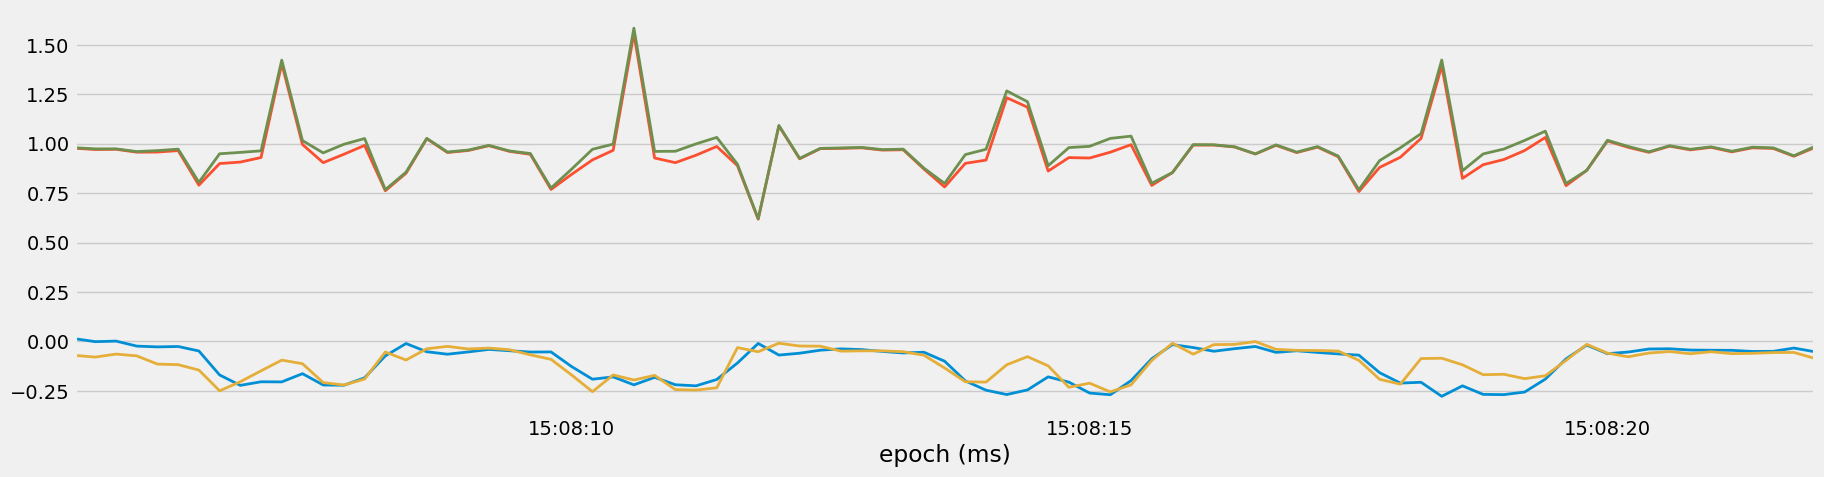

In [14]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_x"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_y"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_z"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

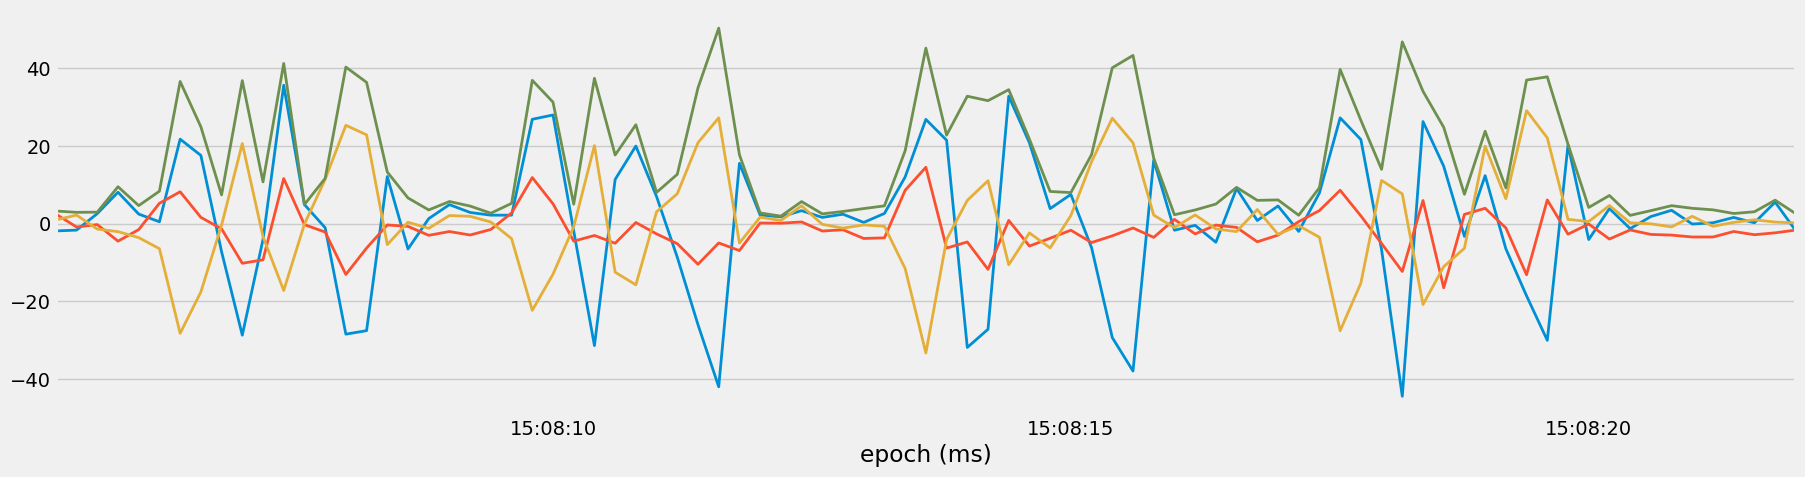

In [15]:
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_x"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_y"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_z"].plot() 
plot_df[plot_df["set"] == plot_df["set"].unique()[0]]["gyr_r"].plot()

In [16]:
row_df  = df[df["label"] == "row"]

In [17]:
bench_set = bench_df[bench_df["set"] == bench_df["set"].unique()[0]]
squat_set = squat_df[squat_df["set"] == squat_df["set"].unique()[0]]
row_set   = row_df[row_df["set"] == row_df["set"].unique()[0]]
ohp_set   = ohp_df[ohp_df["set"] == ohp_df["set"].unique()[0]]
dead_set  = dead_df[dead_df["set"] == dead_df["set"].unique()[0]]

In [18]:
fs = 1000 / 200
LowPass = LowPassFilter()

<AxesSubplot: xlabel='epoch (ms)'>

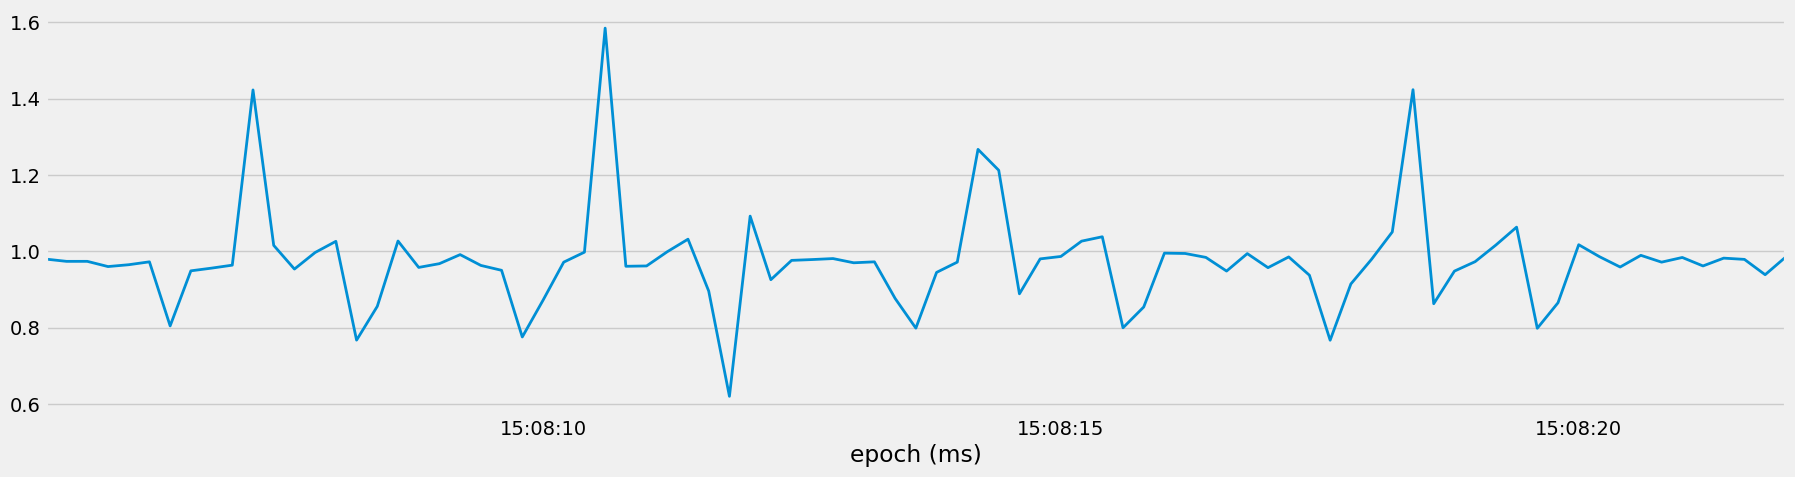

In [19]:
bench_set["acc_r"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

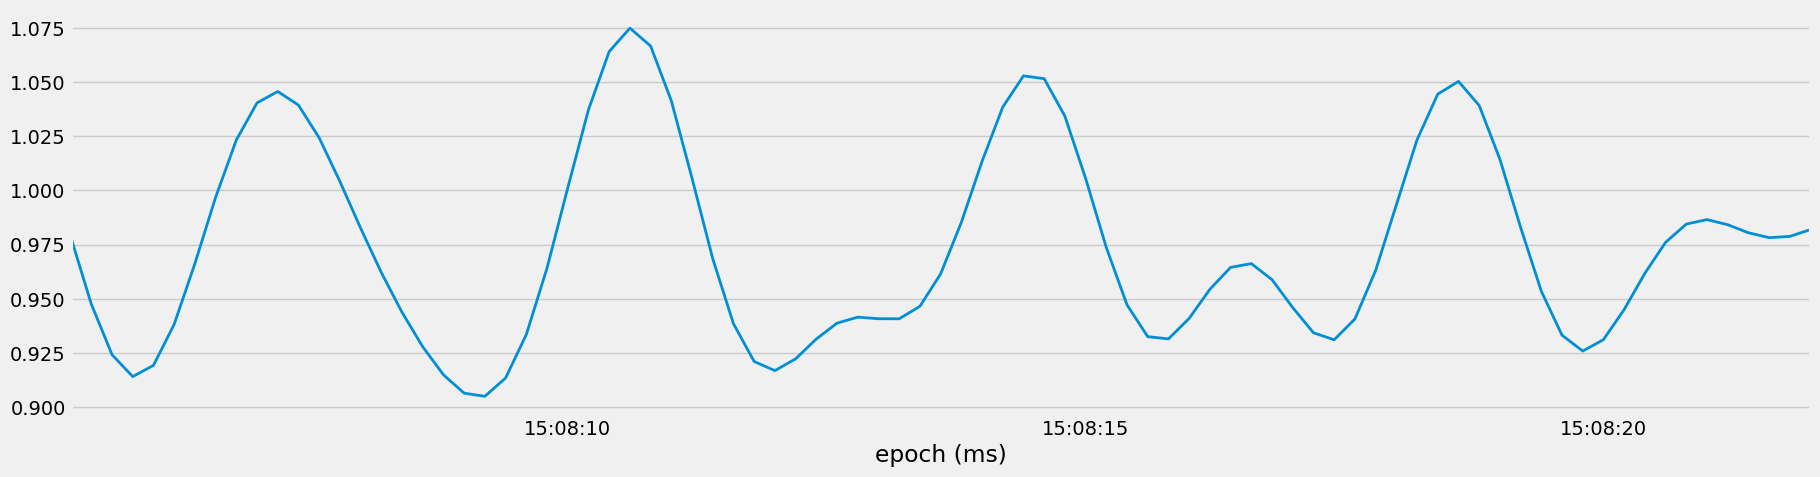

In [20]:
column = "acc_r"
LowPass.low_pass_filter(bench_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.5 , order=10)[column + "_lowpass"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

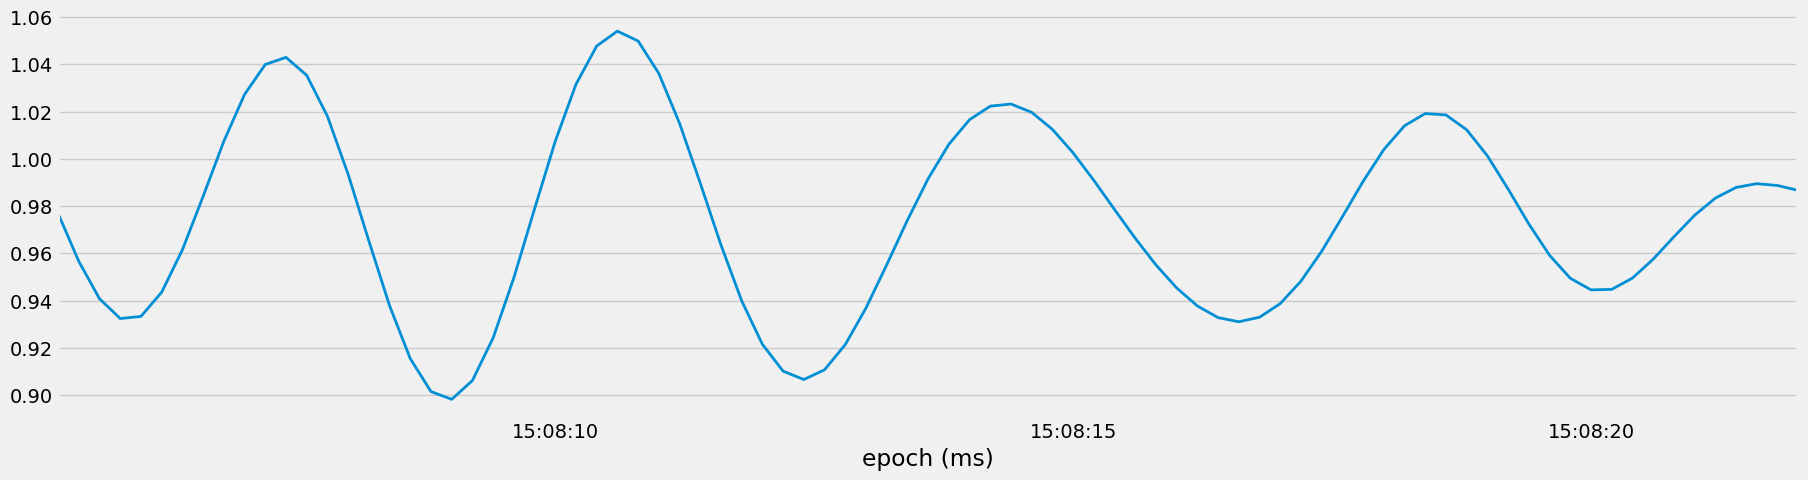

In [21]:
LowPass.low_pass_filter(bench_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.4 , order=10)[column + "_lowpass"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

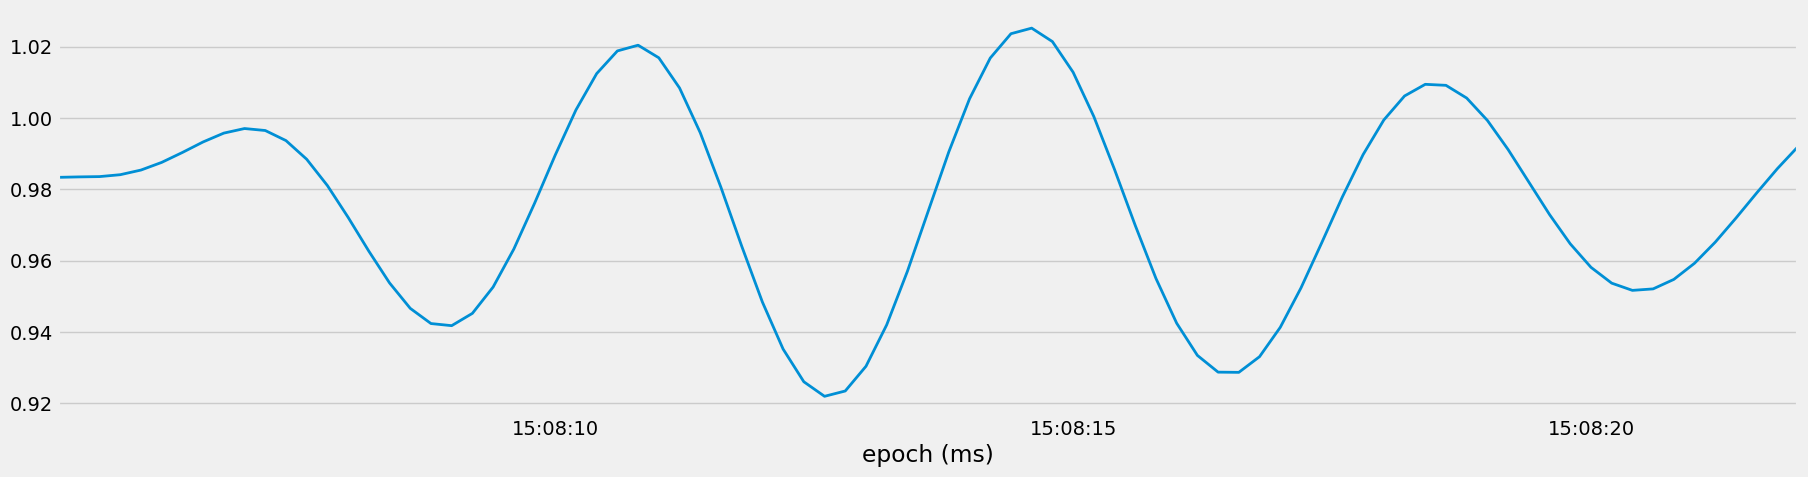

In [22]:
LowPass.low_pass_filter(bench_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.3 , order=10)[column + "_lowpass"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

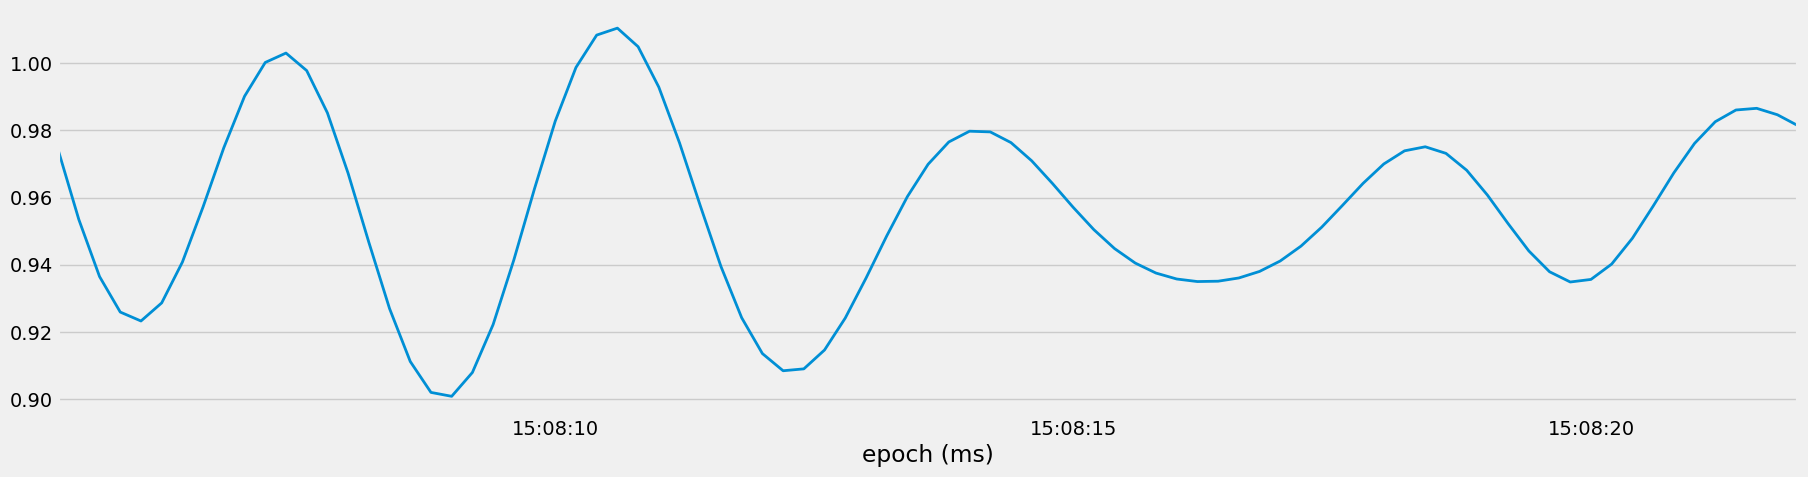

In [23]:
column = "acc_y"
LowPass.low_pass_filter(bench_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.4 , order=10)[column + "_lowpass"].plot()

<AxesSubplot: xlabel='epoch (ms)'>

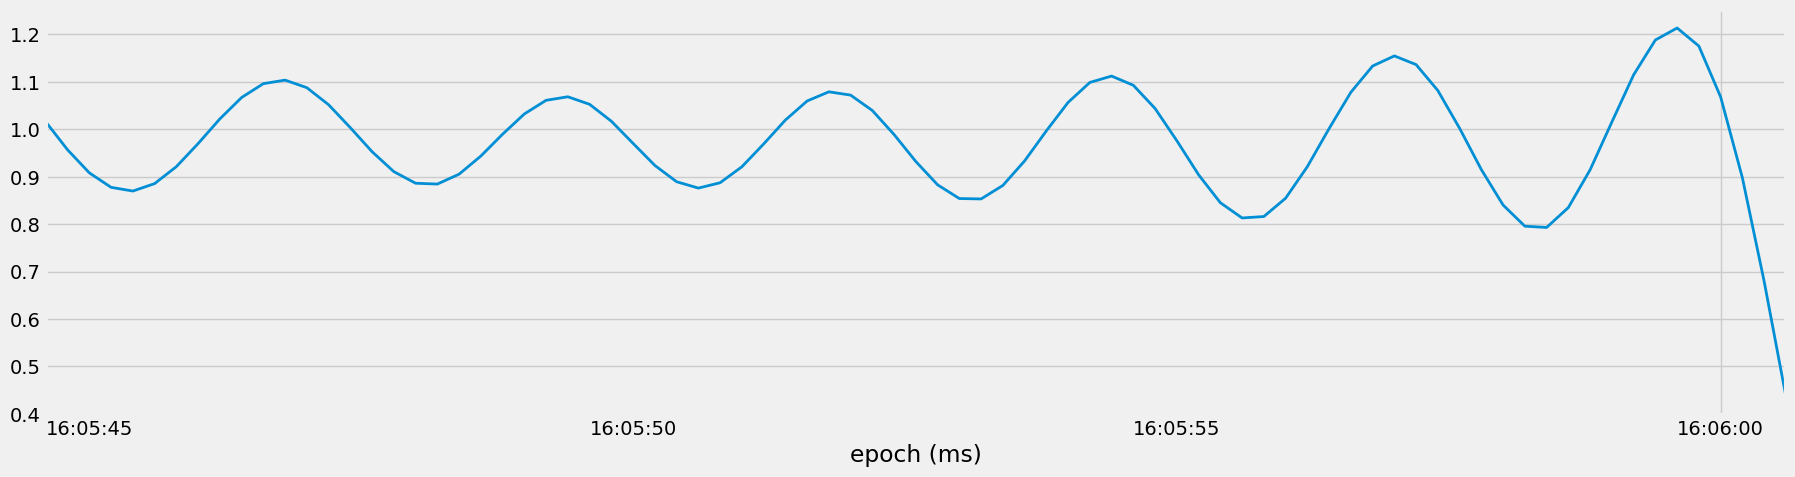

In [24]:
column = "acc_r"
LowPass.low_pass_filter(squat_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.4 , order=10)[column + "_lowpass"].plot()

In [25]:
def count_reps(dataset, column='acc_r', cutoff=0.4, order=10):
    # Apply low-pass filter to smooth the signal
    data = LowPass.low_pass_filter(
        dataset,
        column,
        sampling_frequency=fs,
        cutoff_frequency=cutoff,
        order=order
    )
    
    # Find local maxima in the smoothed signal
    indexes = argrelextrema(data[column + "_lowpass"].values, np.greater)[0]
    
    # Extract peak rows (optional: you can return len(indexes) directly)
    peaks = data.iloc[indexes]
    
    # Return the number of detected peaks as rep count
    return len(peaks)

count_reps(bench_set)

5

In [26]:
bench_set["acc_r"]

epoch (ms)
2019-01-11 15:08:05.200    0.979669
2019-01-11 15:08:05.400    0.973752
2019-01-11 15:08:05.600    0.973795
2019-01-11 15:08:05.800    0.960118
2019-01-11 15:08:06.000    0.964953
                             ...   
2019-01-11 15:08:21.200    0.961738
2019-01-11 15:08:21.400    0.982193
2019-01-11 15:08:21.600    0.978938
2019-01-11 15:08:21.800    0.938789
2019-01-11 15:08:22.000    0.985489
Name: acc_r, Length: 85, dtype: float64

In [27]:
bench_set["acc_r"].values

array([0.97966946, 0.97375189, 0.97379498, 0.96011835, 0.96495308,
       0.97253535, 0.80472991, 0.94894692, 0.95602383, 0.96380561,
       1.4227222 , 1.01563638, 0.95357881, 0.99698909, 1.0261941 ,
       0.76743876, 0.85595184, 1.02702848, 0.95787711, 0.96774726,
       0.99141806, 0.96311136, 0.95030878, 0.77571612, 0.87183689,
       0.9716823 , 0.99780988, 1.58457226, 0.96087119, 0.96173398,
       0.99902013, 1.03182847, 0.89592689, 0.62031484, 1.09224275,
       0.92574538, 0.97632588, 0.97849195, 0.98106122, 0.97003157,
       0.97251615, 0.87653237, 0.79885098, 0.94483888, 0.97176849,
       1.26706728, 1.21233975, 0.88869483, 0.98022055, 0.98659554,
       1.02670076, 1.03818459, 0.79975587, 0.85421221, 0.99526412,
       0.99439492, 0.98414865, 0.948357  , 0.99404644, 0.9572625 ,
       0.98535098, 0.9374376 , 0.76722451, 0.91454155, 0.97920745,
       1.05077126, 1.42335644, 0.8628253 , 0.94820427, 0.97301208,
       1.01644987, 1.06336694, 0.79847396, 0.86533866, 1.01733

In [28]:
argrelextrema(bench_set["acc_r"].values, np.greater)

(array([ 2,  5, 10, 14, 17, 20, 27, 31, 34, 38, 40, 45, 51, 54, 58, 60, 66,
        71, 74, 77, 79, 81], dtype=int64),)

In [29]:
indexes  = argrelextrema(bench_set["acc_r"].values, np.greater)

In [30]:
indexes

(array([ 2,  5, 10, 14, 17, 20, 27, 31, 34, 38, 40, 45, 51, 54, 58, 60, 66,
        71, 74, 77, 79, 81], dtype=int64),)

In [34]:
data = LowPass.low_pass_filter(squat_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.4 , order=10)


argrelextrema(data[column + "_lowpass"].values, np.greater)

(array([11, 24, 36, 49, 62, 75], dtype=int64),)

In [35]:
data = LowPass.low_pass_filter(squat_set,col=column , sampling_frequency=fs , 
                        cutoff_frequency= 0.4 , order=10)


indexes = argrelextrema(data[column + "_lowpass"].values, np.greater)

In [36]:
indexes

(array([11, 24, 36, 49, 62, 75], dtype=int64),)

In [37]:
peaks = data.iloc[indexes]

In [38]:
peaks

acc_x     acc_y     acc_z    gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                    
2019-01-11 16:05:46.800  0.179  0.605000  0.898500   2.0490 -1.0244  1.1462   
2019-01-11 16:05:49.400  0.154  0.711667  0.973667   0.4636 -4.7802 -1.4268   
2019-01-11 16:05:51.800  0.174  0.716000  1.000000   3.7928 -1.8782 -2.9268   
2019-01-11 16:05:54.400  0.223  0.736000  0.918500  -5.4510 -1.5852 -0.9390   
2019-01-11 16:05:57.000  0.201  0.721333  0.995667  11.0120 -6.5122  0.6462   
2019-01-11 16:05:59.600  0.201  0.813000  0.933000   8.2684 -3.8658 -2.8292   

                        participant  label category  set     acc_r      gyr_r  \
epoch (ms)                                                                      
2019-01-11 16:05:46.800           A  squat   medium   27  1.097893   2.561556   
2019-01-11 16:05:49.400           A  squat   medium   27  1.215818   5.010089   
2019-01-11 16:05:51.800           A  squat   medium   27  1.242148   5.145787   
2019-01-11 16:05:54.400           A  squat   medium   27  1.197943   5.753954   
2019-01-11 16:05:57.000           A  squat   medium   27  1.245823  12.809780   
2019-01-11 16:05:59.600           A  squat   medium   27  1.253738   9.555900   

                         acc_r_lowpass  
epoch (ms)                              
2019-01-11 16:05:46.800       1.103685  
2019-01-11 16:05:49.400       1.068594  
2019-01-11 16:05:51.800       1.079067  
2019-01-11 16:05:54.400       1.112265  
2019-01-11 16:05:57.000       1.154759  
2019-01-11 16:05:59.600       1.213641

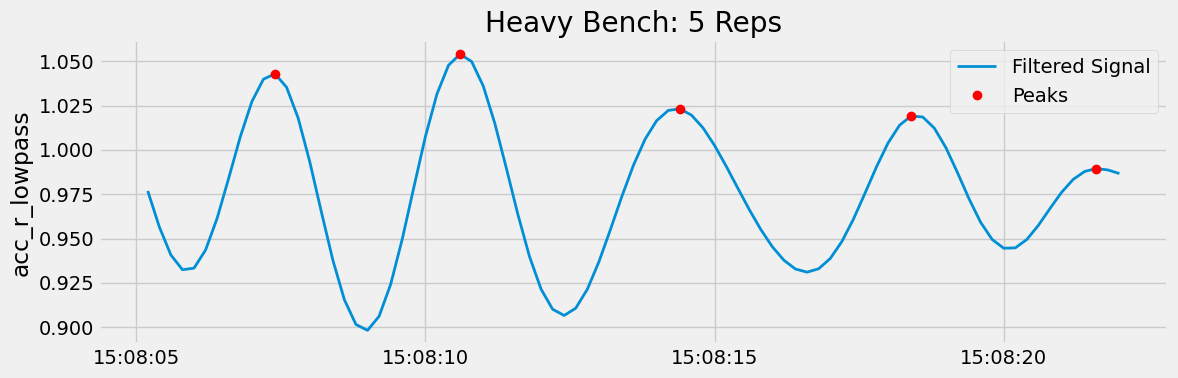

5

In [40]:
def count_reps(dataset, column='acc_r', cutoff=0.4, order=10):
    # Apply low-pass filter to smooth the signal
    data = LowPass.low_pass_filter(
        dataset,
        column,
        sampling_frequency=fs,
        cutoff_frequency=cutoff,
        order=order
    )
      # Find local maxima in the smoothed signal
    indexes = argrelextrema(data[column + "_lowpass"].values, np.greater)[0]
    
    # Extract peak rows (optional: you can return len(indexes) directly)
    peaks = data.iloc[indexes]
    
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Plot the low-pass filtered signal
    ax.plot(dataset[f"{column}_lowpass"], label='Filtered Signal')
    
    # Plot the peaks
    ax.plot(peaks.index, peaks[f"{column}_lowpass"], 'ro', label='Peaks')
    
    # Axis label
    ax.set_ylabel(f"{column}_lowpass")
    
    # Title using exercise and category
    exercise = dataset["label"].iloc[0].title()
    category = dataset["category"].iloc[0].title()
    rep_count = len(peaks)
    ax.set_title(f"{category} {exercise}: {rep_count} Reps")
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    
  
    
    # Return the number of detected peaks as rep count
    return len(peaks)

count_reps(bench_set)

In [41]:
df["reps"] = df["category"]

In [42]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-20 17:33:27.000           E    row   medium   90  1.045408  5.804424   
2019-01-20 17:33:27.200           E    row   medium   90  1.032376  3.611408   
2019-01-20 17:33:27.400           E    row   medium   90  1.035995  5.869377   
2019-01-20 17:33:27.600           E    row   medium   90  1.027367  1.173990   
2019-01-20 17:33:27.800           E    row   medium   90  1.036616  4.283778   

                           reps  
epoch (ms)                       
2019-01-11 15:08:05.200   heavy  
2019-01-11 15:08:05.400   heavy  
2019-01-11 15:08:05.600   heavy  
2019-01-11 15:08:05.800   heavy  
2019-01-11 15:08:06.000   heavy  
...                         ...  
2019-01-20 17:33:27.000  medium  
2019-01-20 17:33:27.200  medium  
2019-01-20 17:33:27.400  medium  
2019-01-20 17:33:27.600  medium  
2019-01-20 17:33:27.800  medium  

[7899 rows x 13 columns]

In [43]:
df["reps"] = df["category"].apply(lambda x : 5 if x == "heavy" else 10 )

In [44]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-20 17:33:27.000           E    row   medium   90  1.045408  5.804424   
2019-01-20 17:33:27.200           E    row   medium   90  1.032376  3.611408   
2019-01-20 17:33:27.400           E    row   medium   90  1.035995  5.869377   
2019-01-20 17:33:27.600           E    row   medium   90  1.027367  1.173990   
2019-01-20 17:33:27.800           E    row   medium   90  1.036616  4.283778   

                         reps  
epoch (ms)                     
2019-01-11 15:08:05.200     5  
2019-01-11 15:08:05.400     5  
2019-01-11 15:08:05.600     5  
2019-01-11 15:08:05.800     5  
2019-01-11 15:08:06.000     5  
...                       ...  
2019-01-20 17:33:27.000    10  
2019-01-20 17:33:27.200    10  
2019-01-20 17:33:27.400    10  
2019-01-20 17:33:27.600    10  
2019-01-20 17:33:27.800    10  

[7899 rows x 13 columns]

In [51]:
reps_df

category  label  set  reps
0     heavy  bench    1     5
1     heavy  bench    2     5
2     heavy  bench    3     5
3     heavy  bench    4     5
4     heavy  bench   30     5
..      ...    ...  ...   ...
80   medium  squat   28    10
81   medium  squat   29    10
82   medium  squat   38    10
83   medium  squat   63    10
84   medium  squat   64    10

[85 rows x 4 columns]

In [52]:
df

acc_x     acc_y     acc_z   gyr_x   gyr_y   gyr_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set     acc_r     gyr_r  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200           B  bench    heavy   30  0.979669  3.225625   
2019-01-11 15:08:05.400           B  bench    heavy   30  0.973752  2.887270   
2019-01-11 15:08:05.600           B  bench    heavy   30  0.973795  2.936720   
2019-01-11 15:08:05.800           B  bench    heavy   30  0.960118  9.473502   
2019-01-11 15:08:06.000           B  bench    heavy   30  0.964953  4.623585   
...                             ...    ...      ...  ...       ...       ...   
2019-01-20 17:33:27.000           E    row   medium   90  1.045408  5.804424   
2019-01-20 17:33:27.200           E    row   medium   90  1.032376  3.611408   
2019-01-20 17:33:27.400           E    row   medium   90  1.035995  5.869377   
2019-01-20 17:33:27.600           E    row   medium   90  1.027367  1.173990   
2019-01-20 17:33:27.800           E    row   medium   90  1.036616  4.283778   

                         reps  
epoch (ms)                     
2019-01-11 15:08:05.200     5  
2019-01-11 15:08:05.400     5  
2019-01-11 15:08:05.600     5  
2019-01-11 15:08:05.800     5  
2019-01-11 15:08:06.000     5  
...                       ...  
2019-01-20 17:33:27.000    10  
2019-01-20 17:33:27.200    10  
2019-01-20 17:33:27.400    10  
2019-01-20 17:33:27.600    10  
2019-01-20 17:33:27.800    10  

[7899 rows x 13 columns]

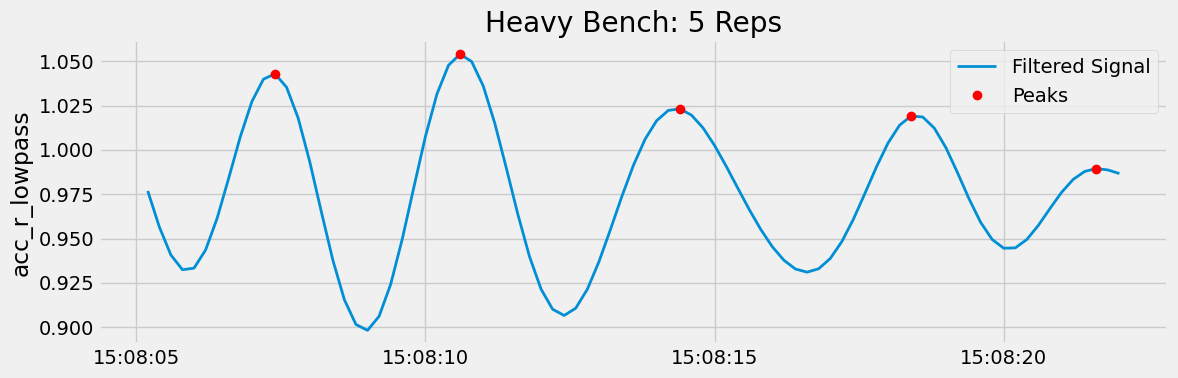

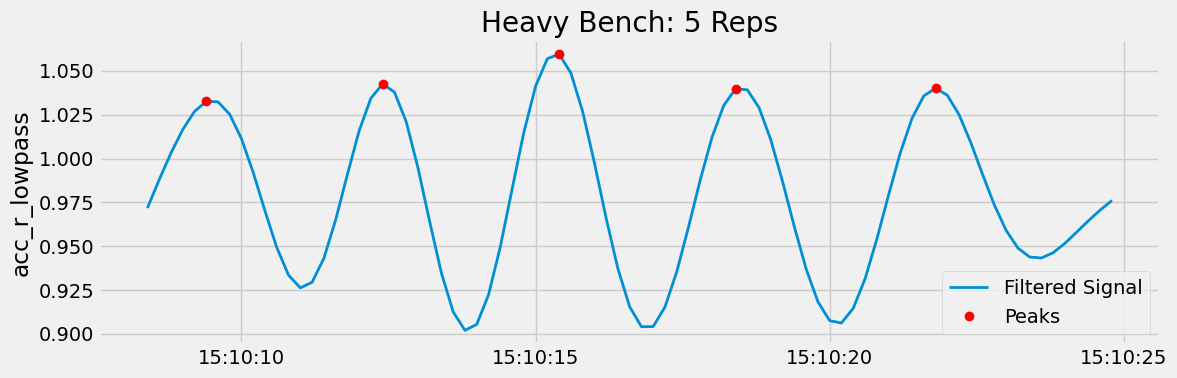

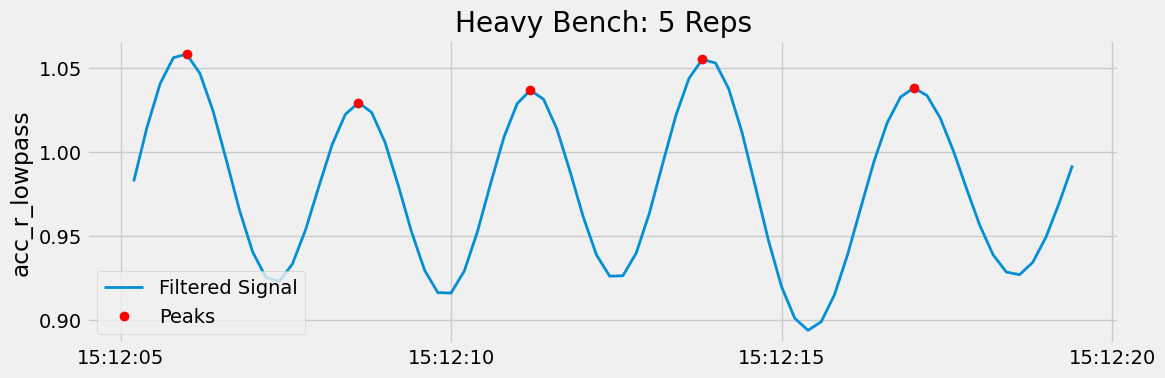

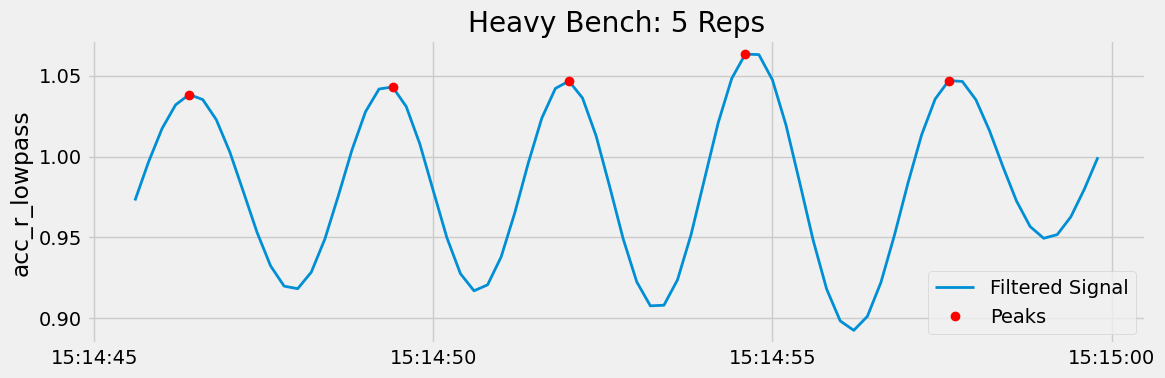

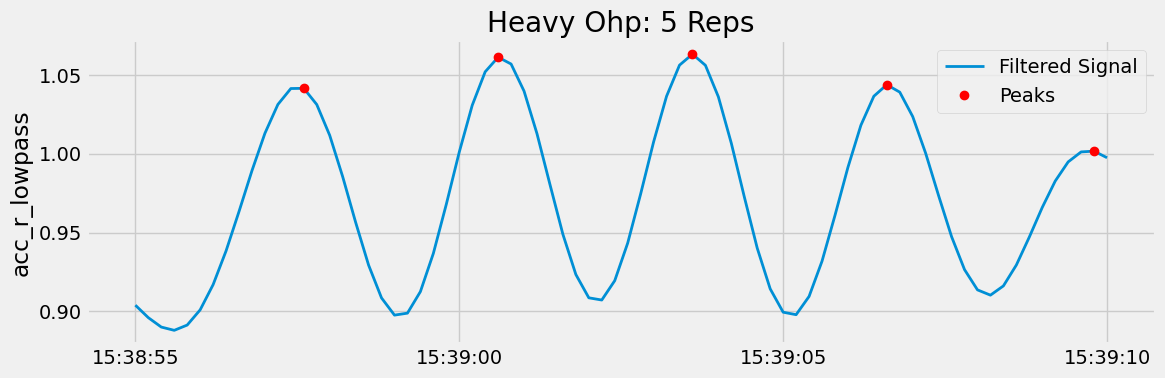

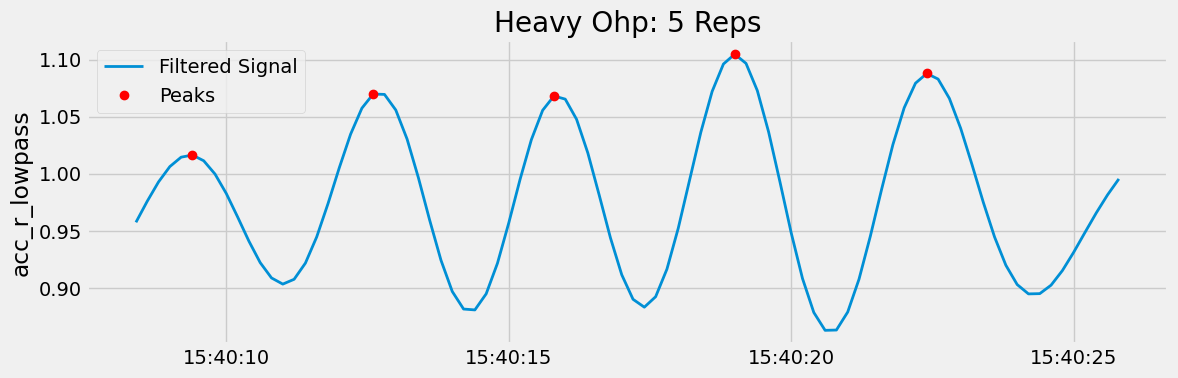

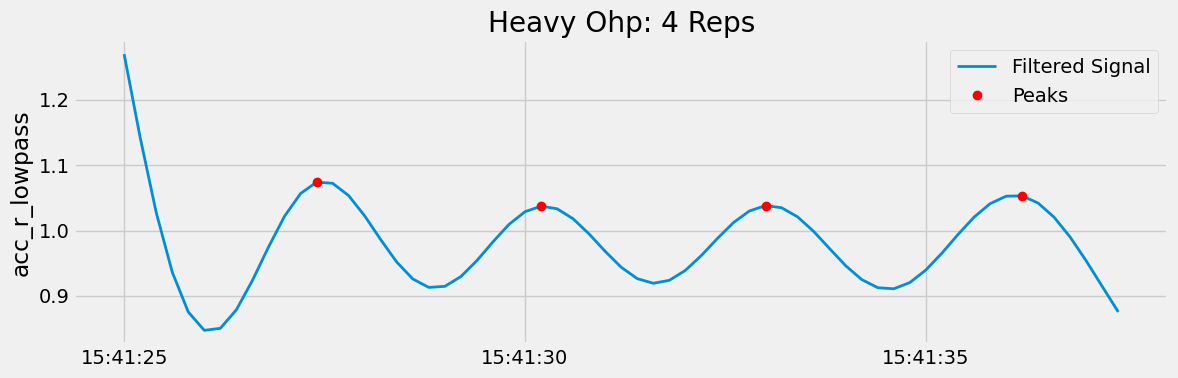

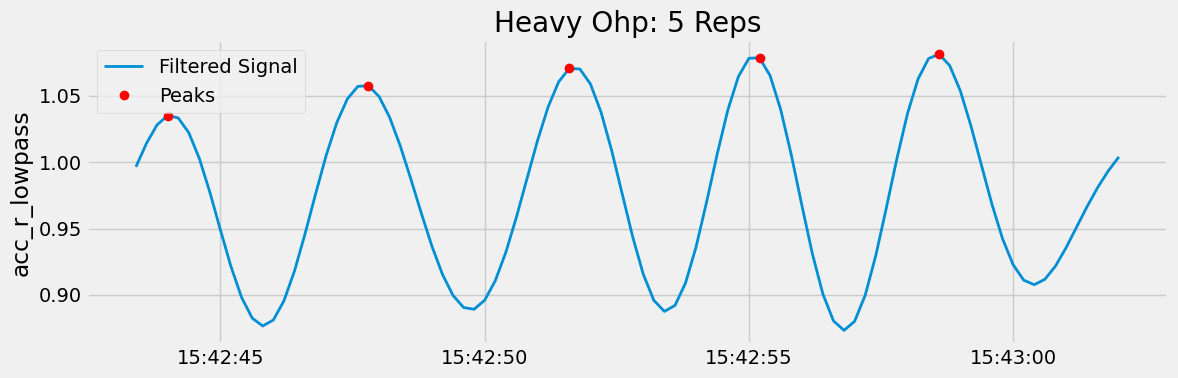

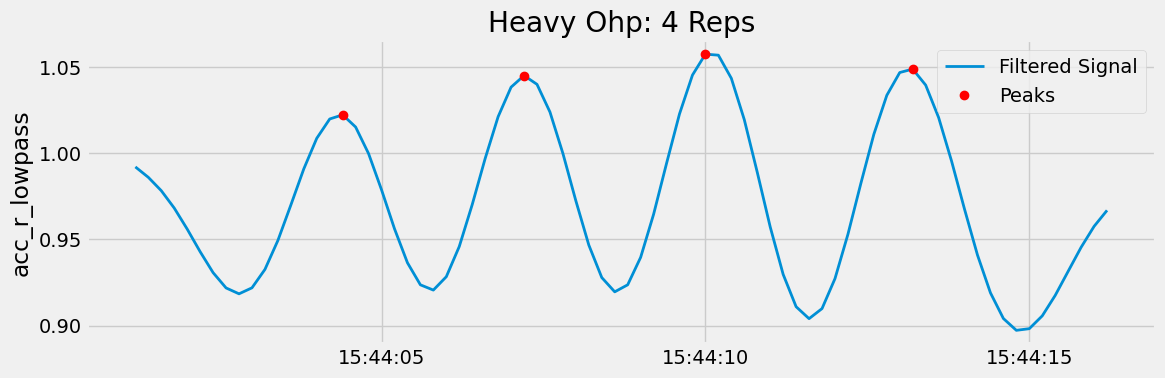

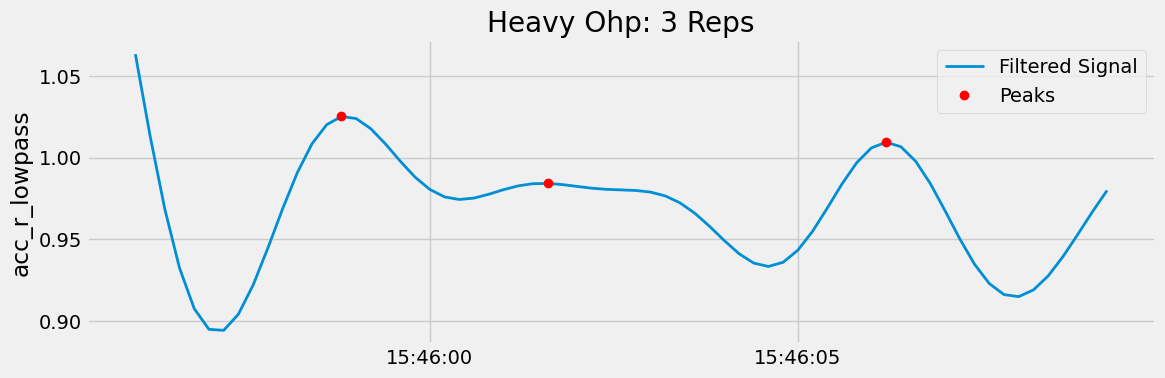

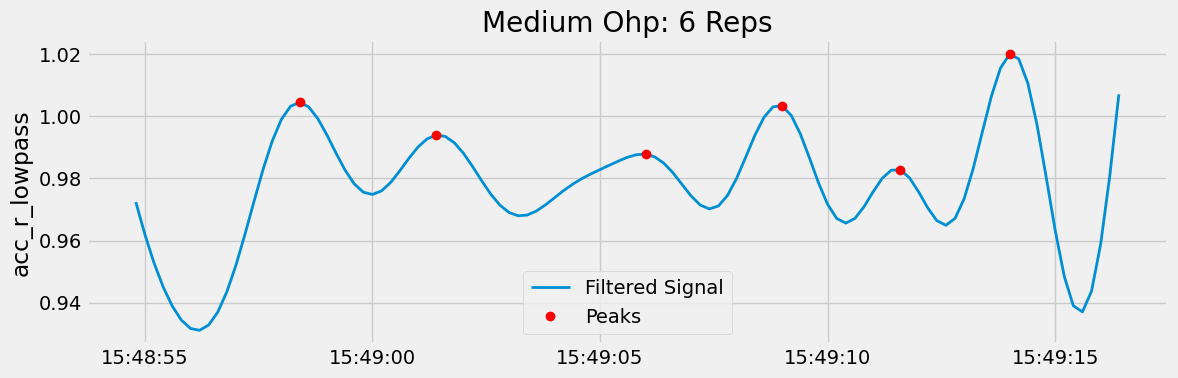

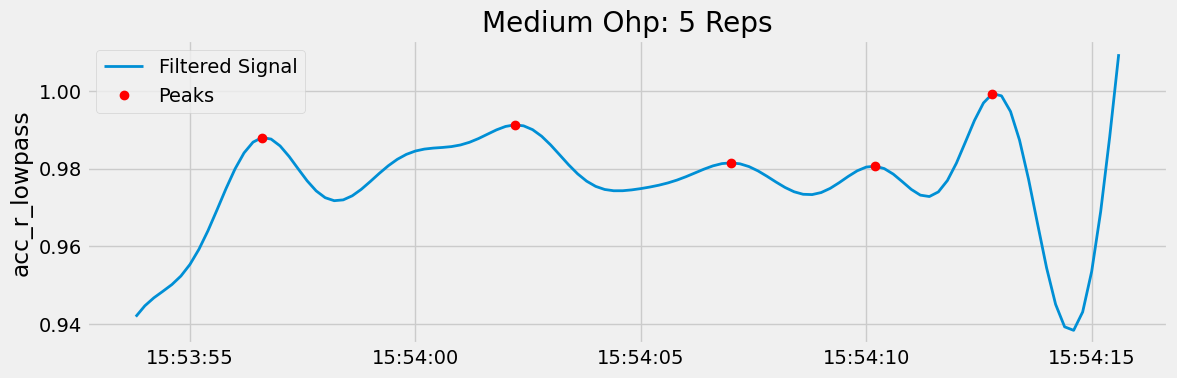

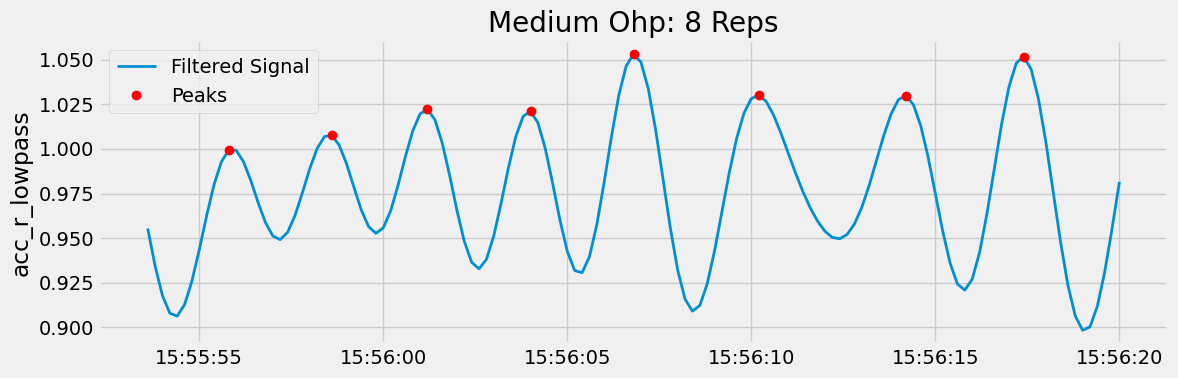

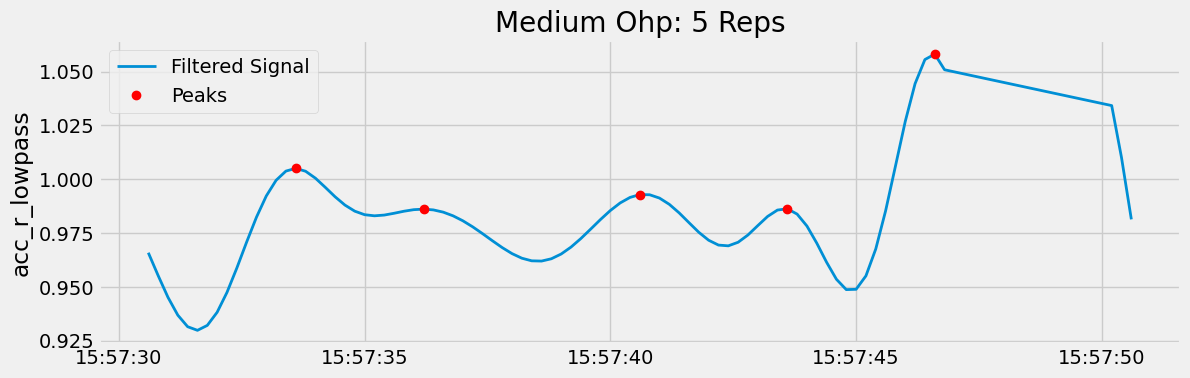

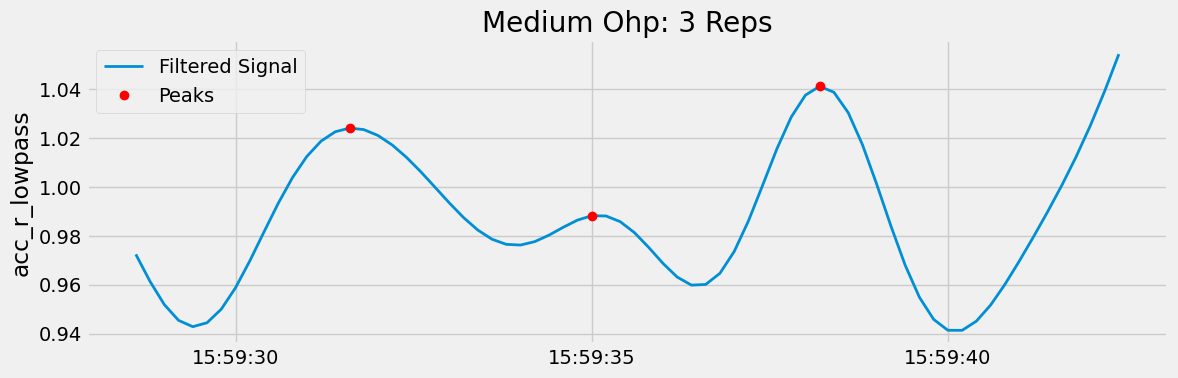

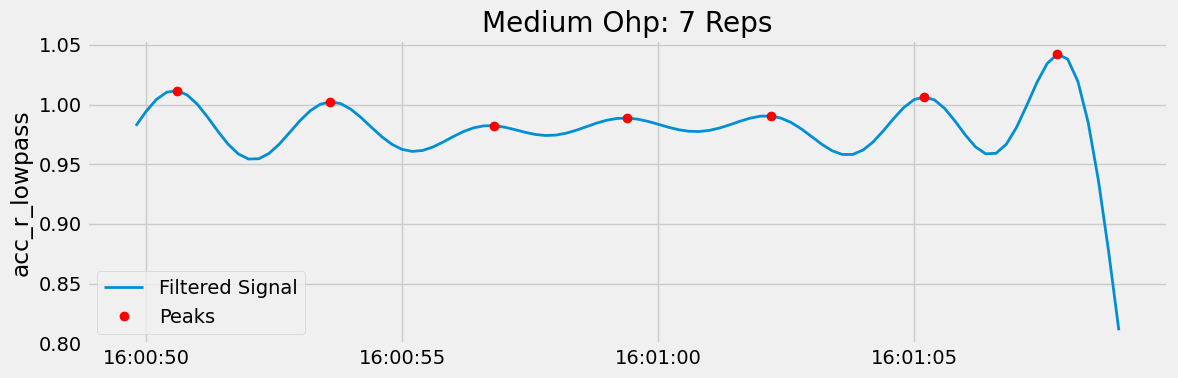

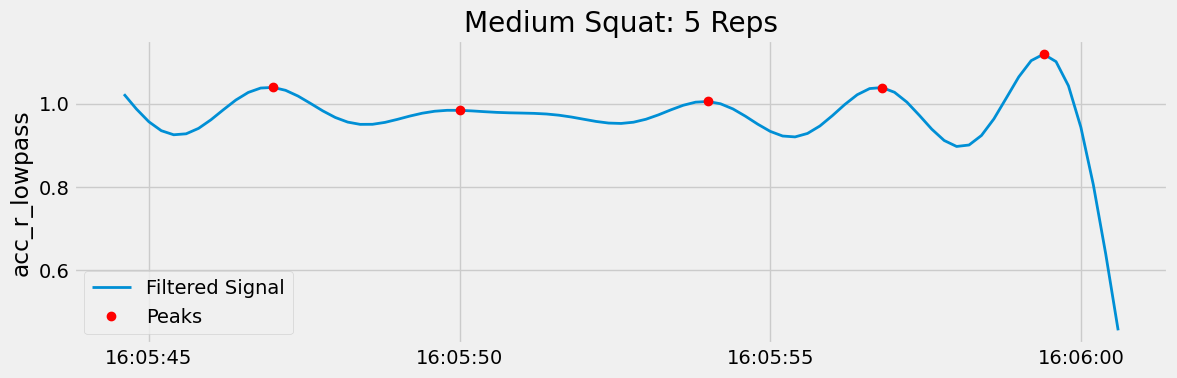

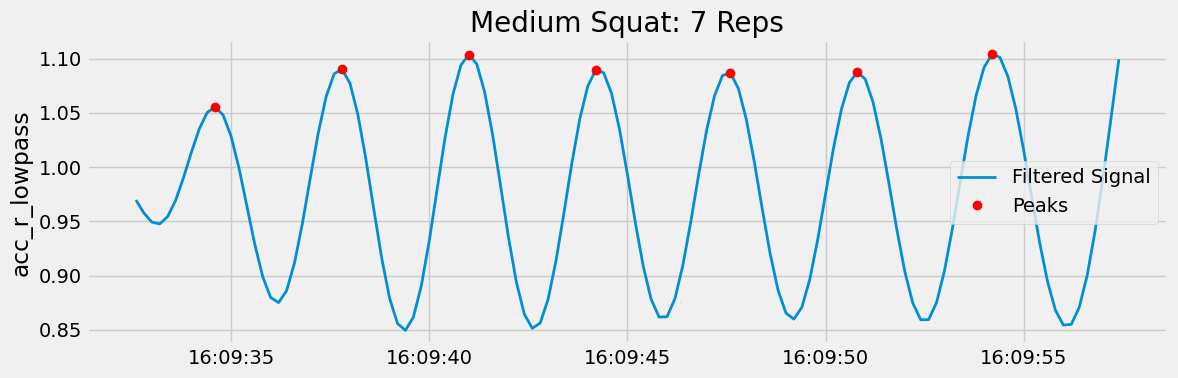

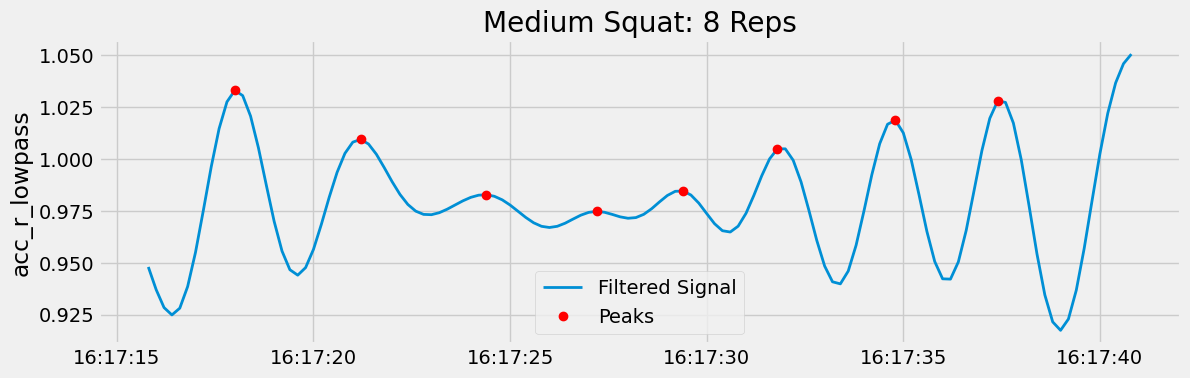

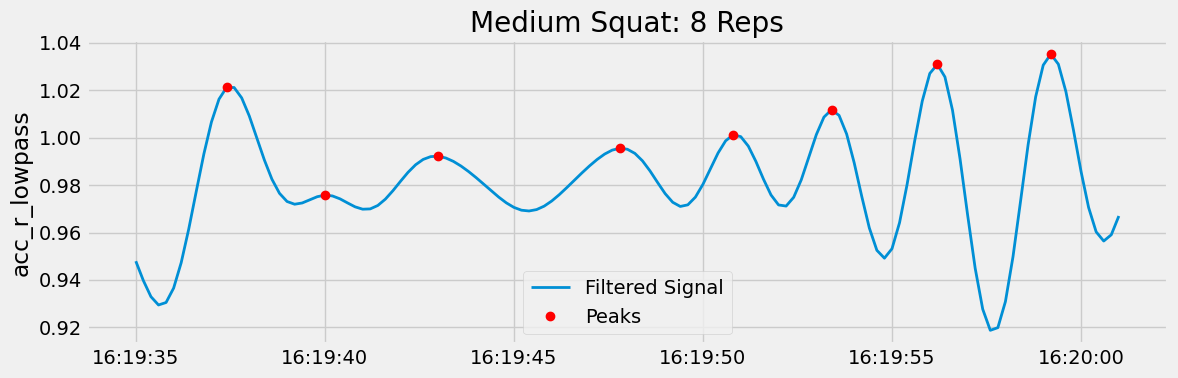

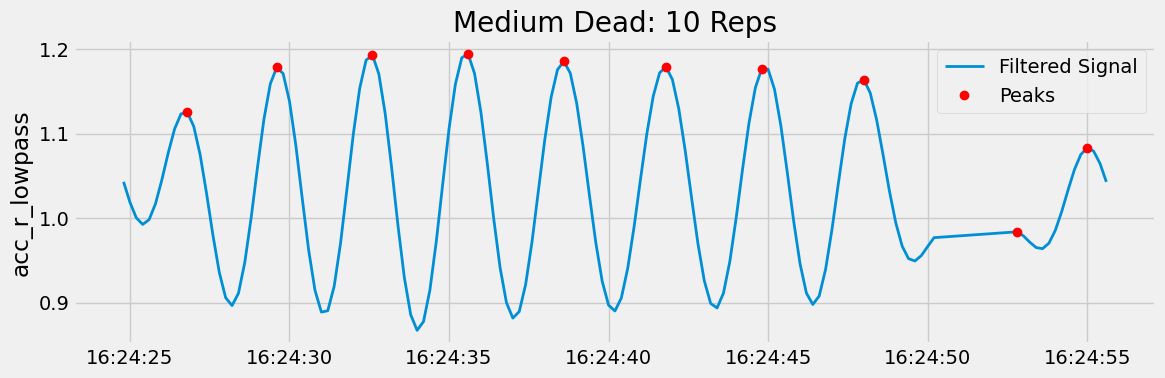

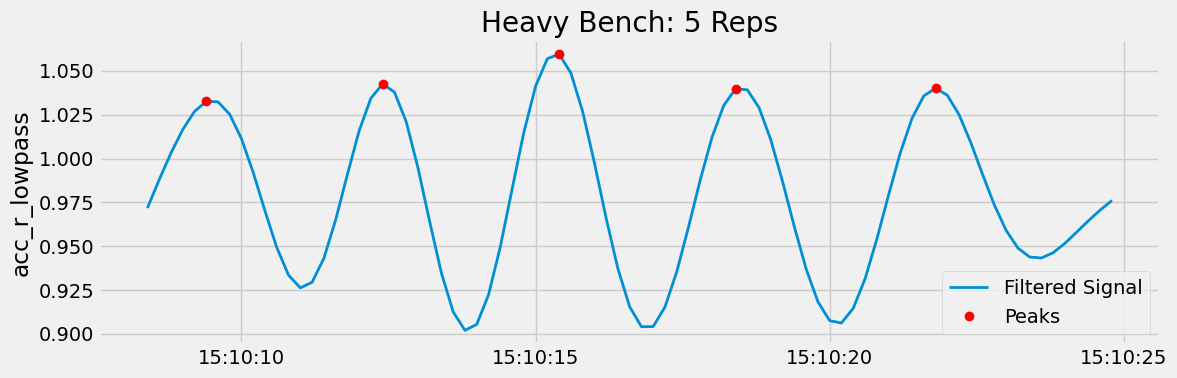

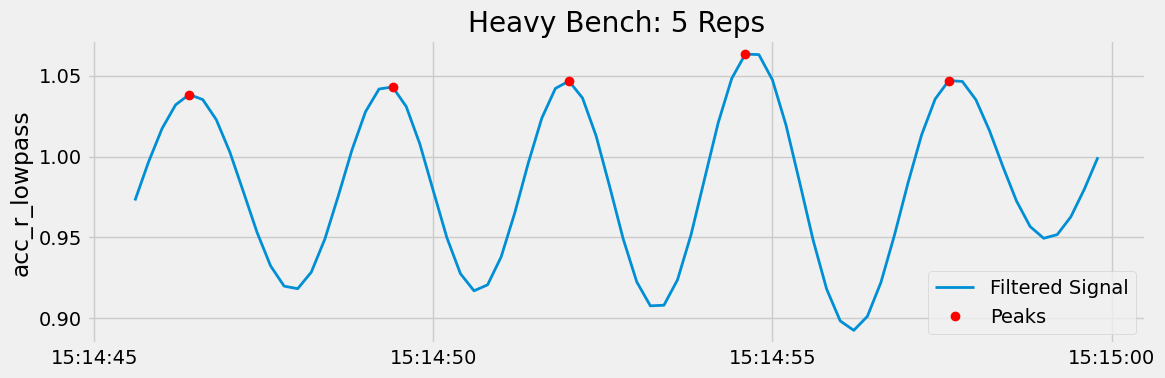

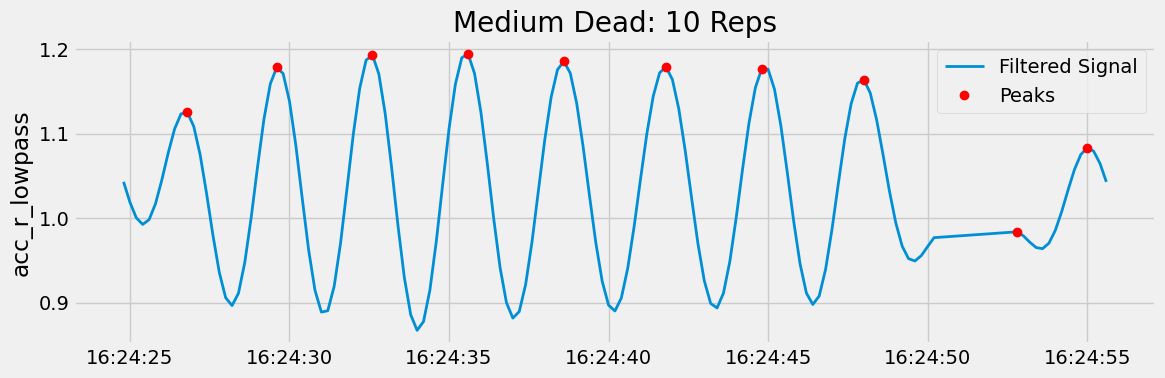

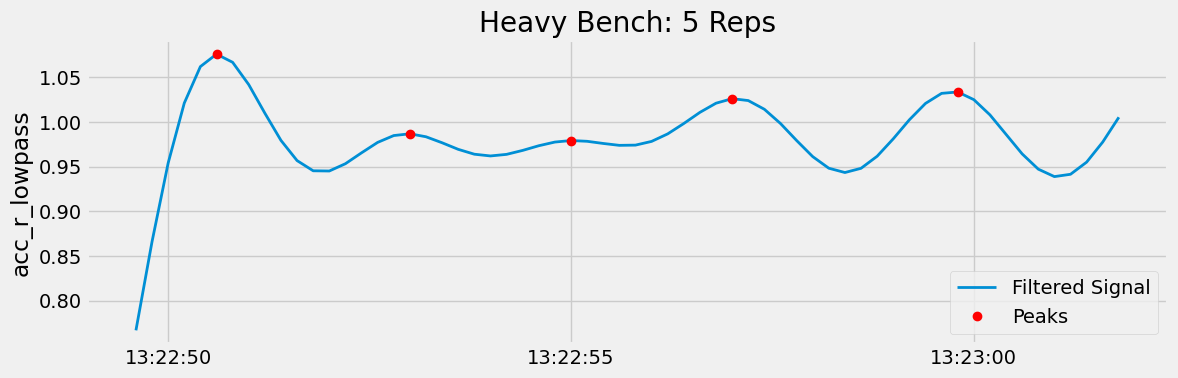

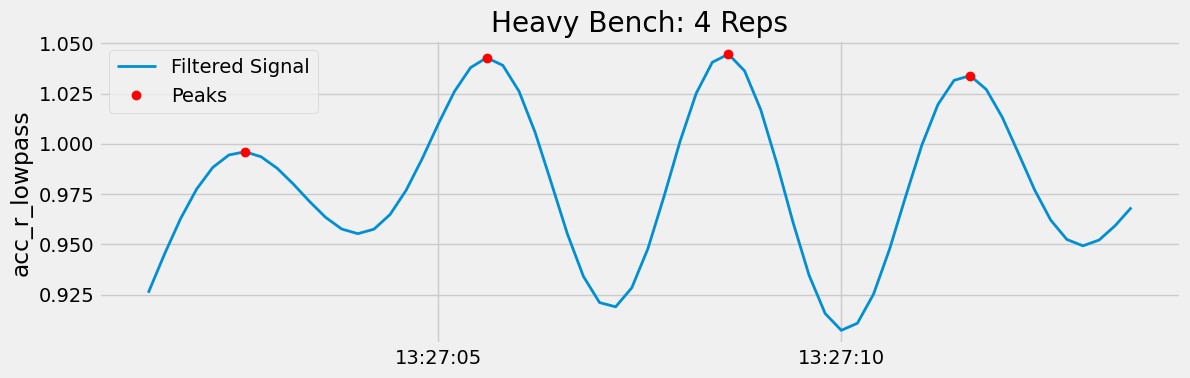

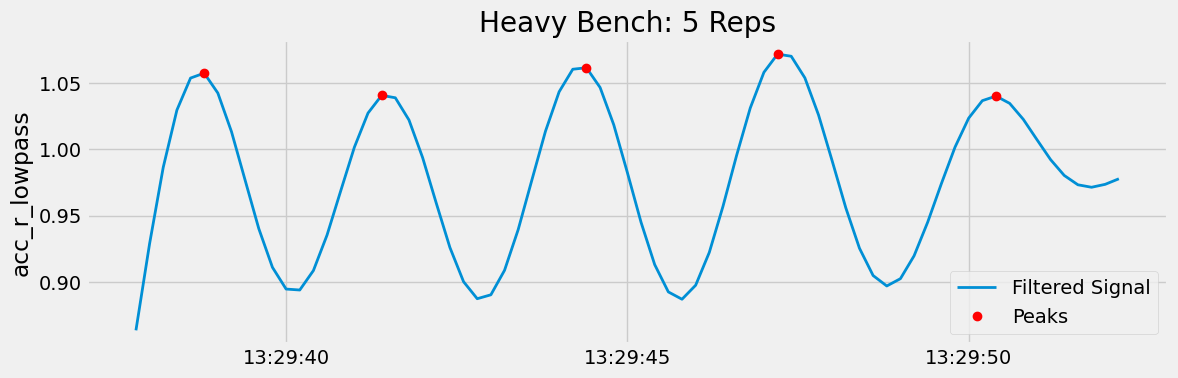

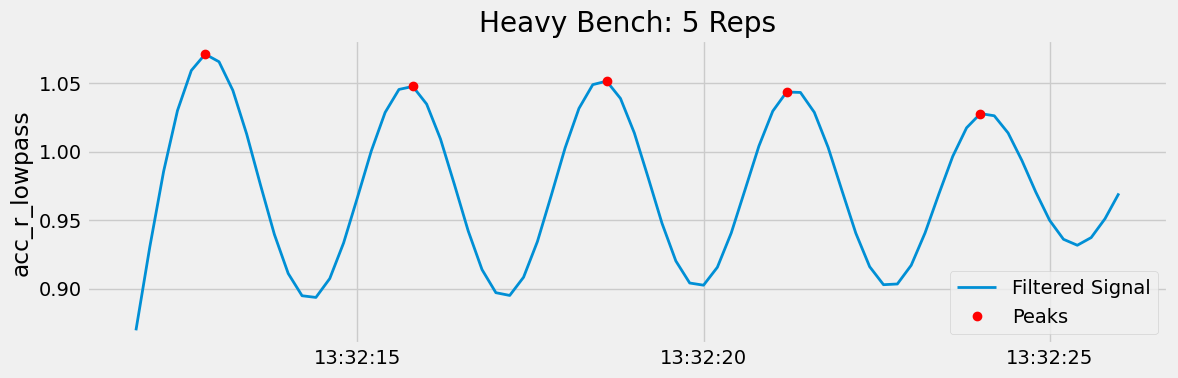

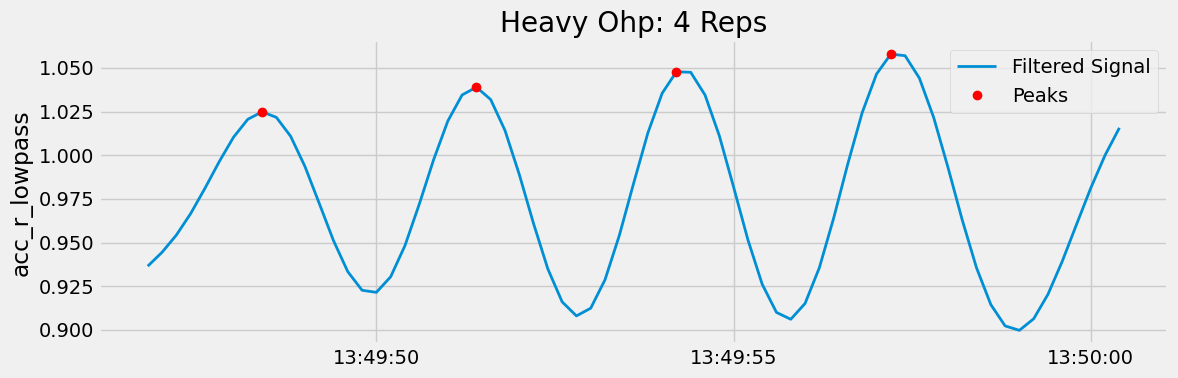

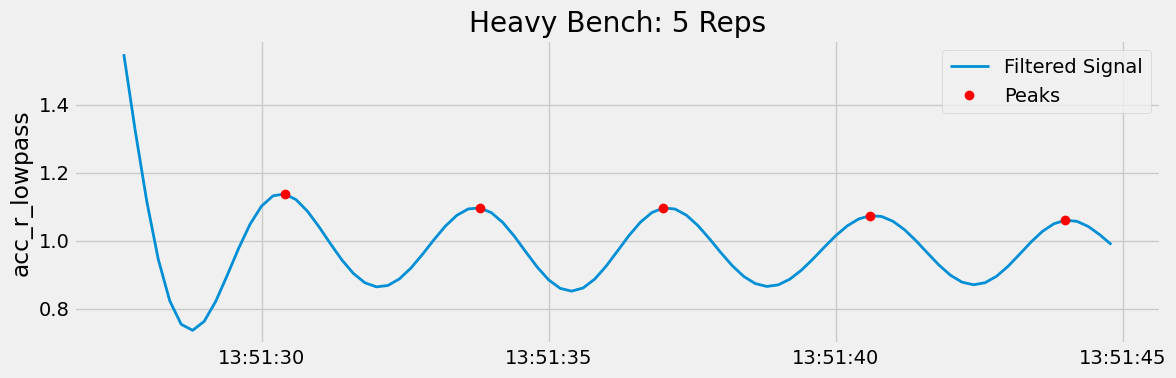

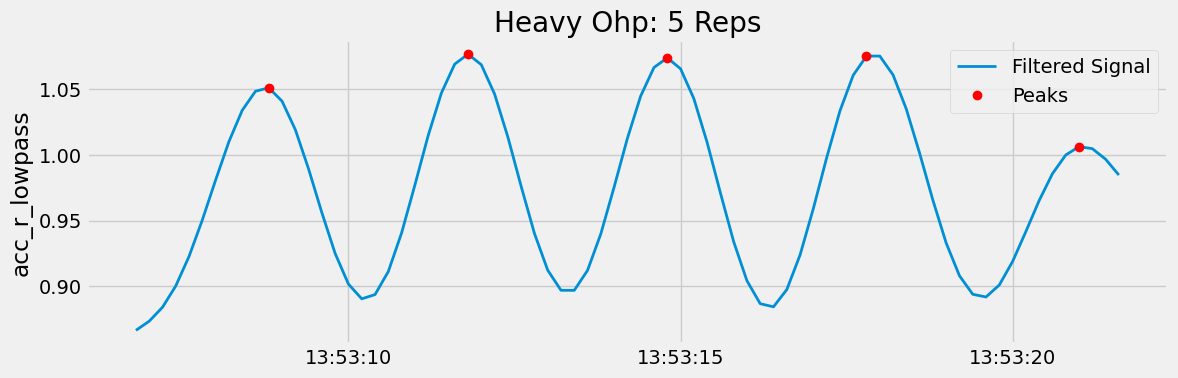

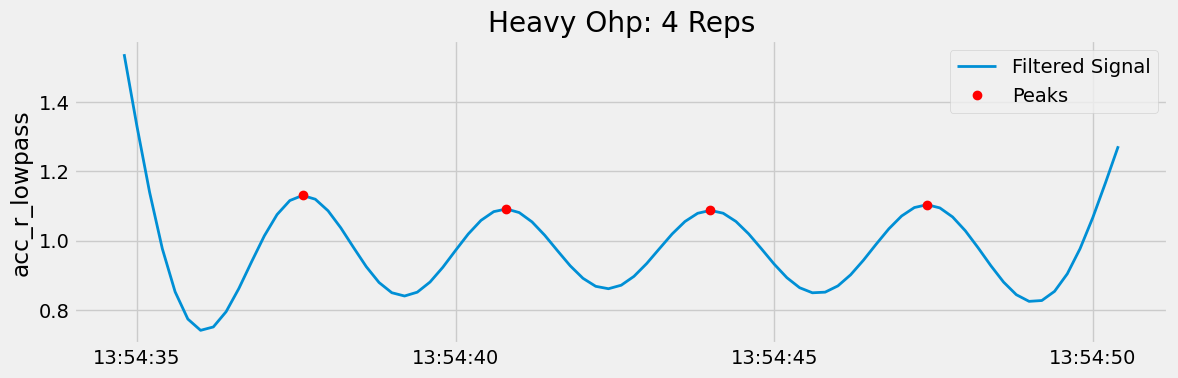

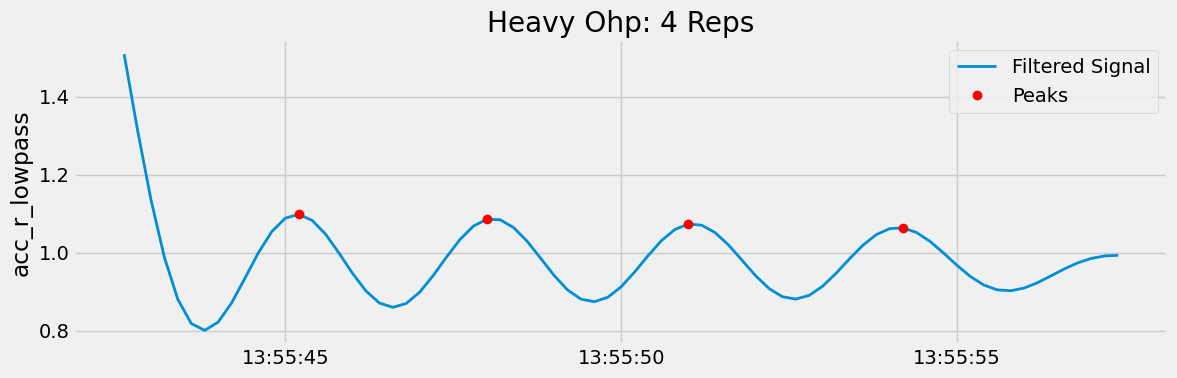

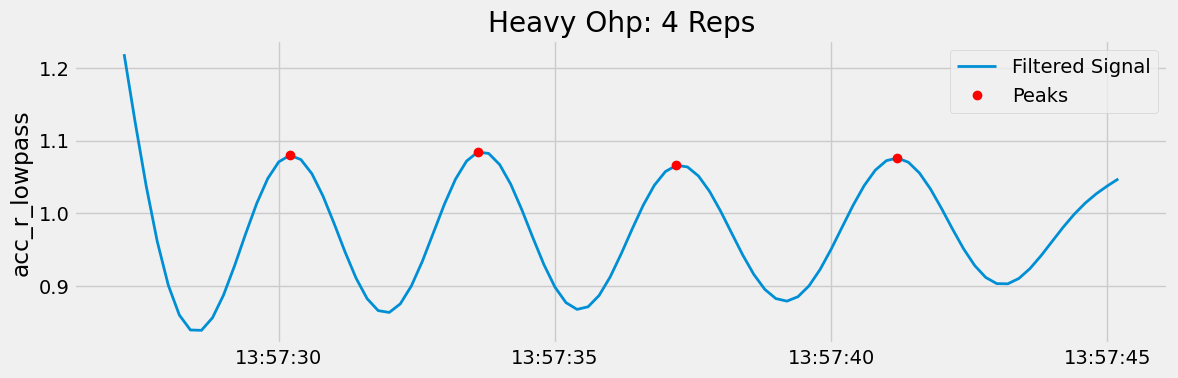

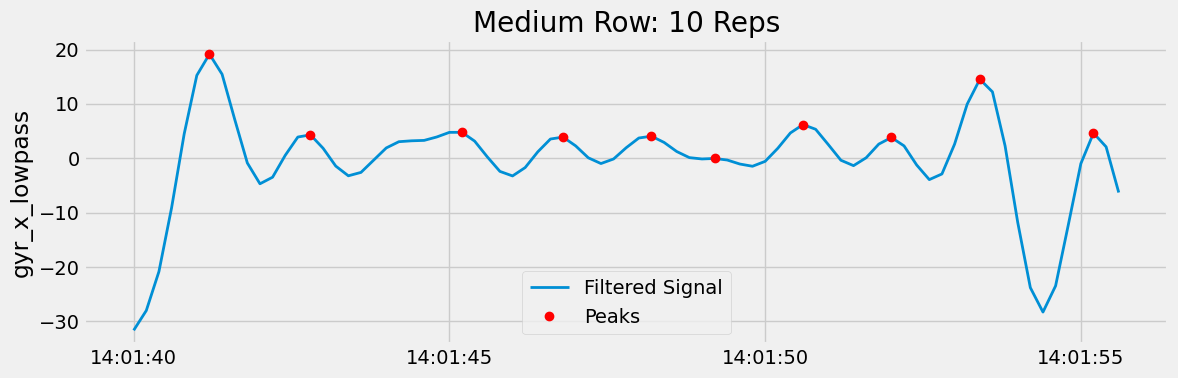

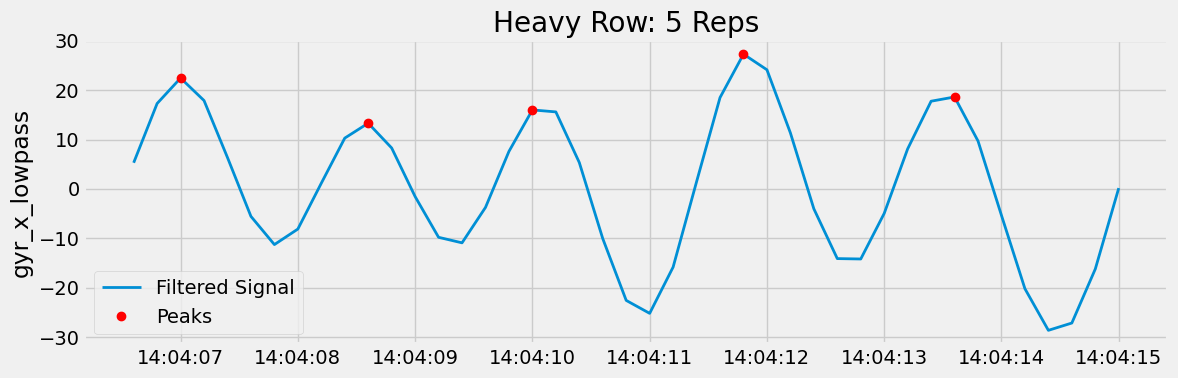

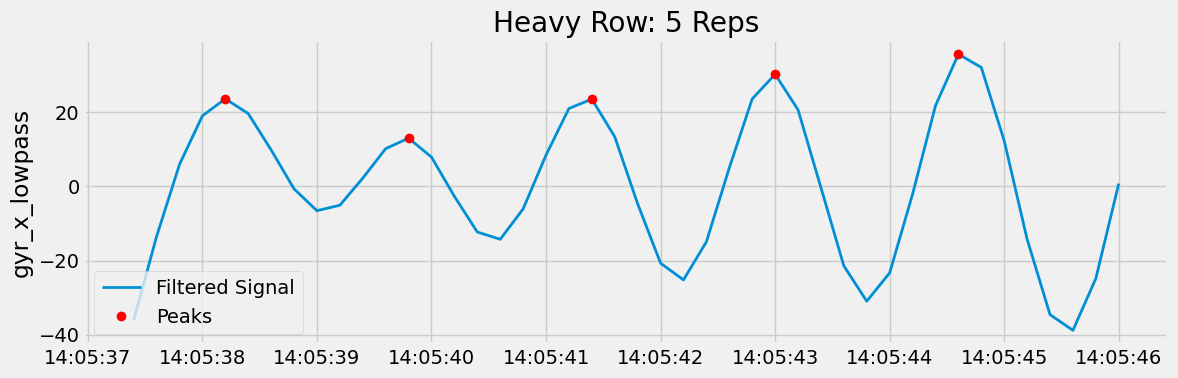

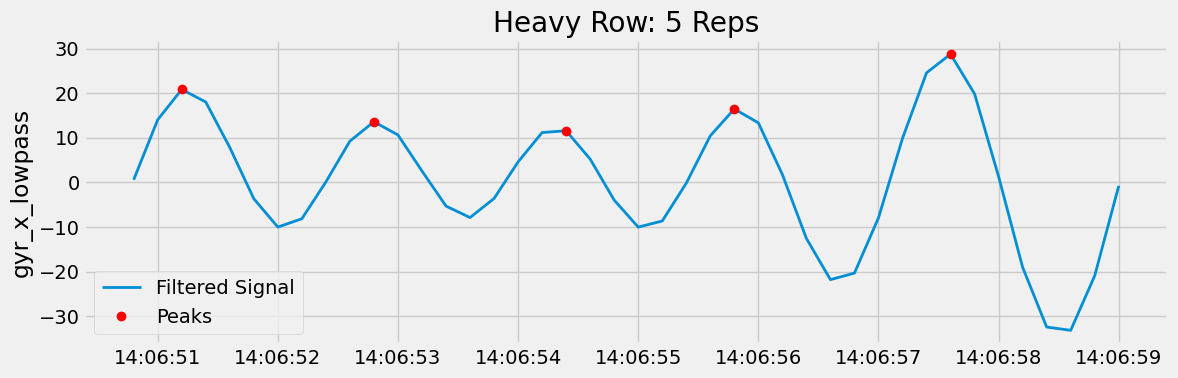

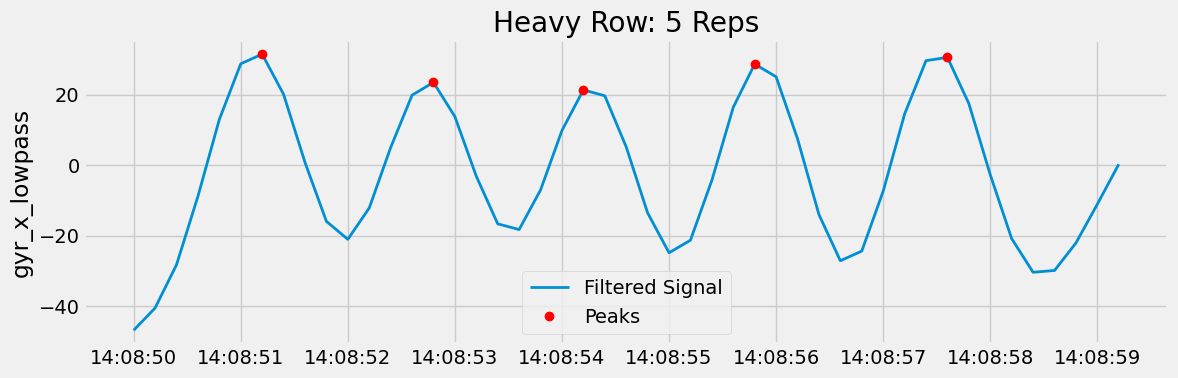

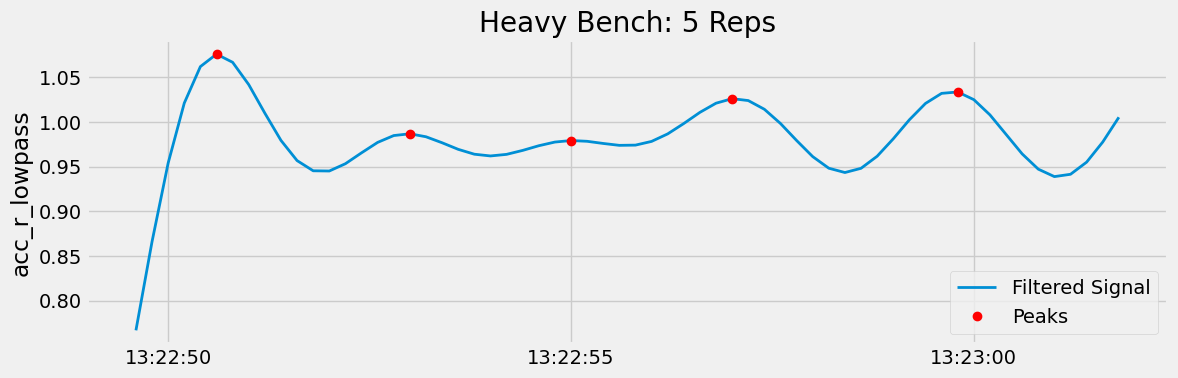

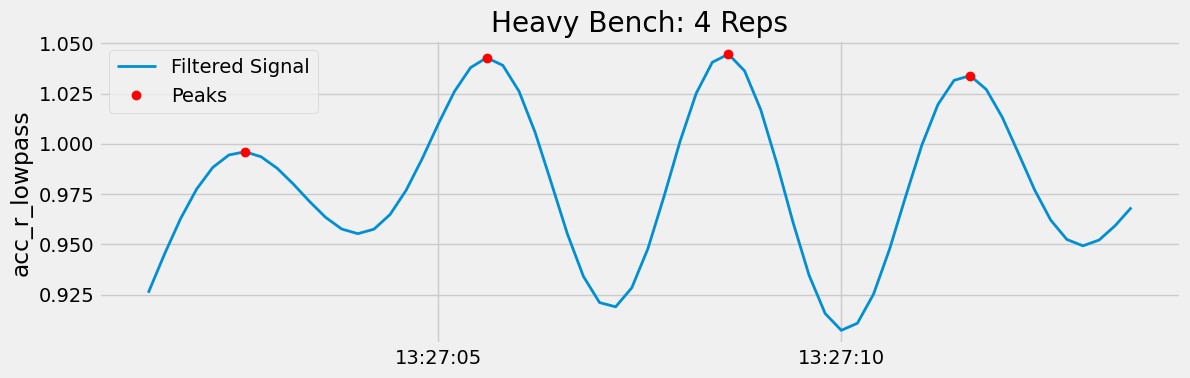

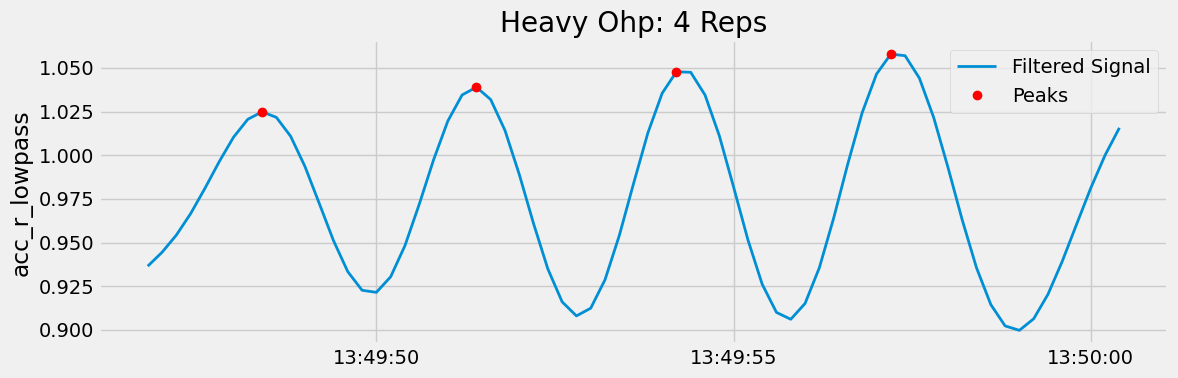

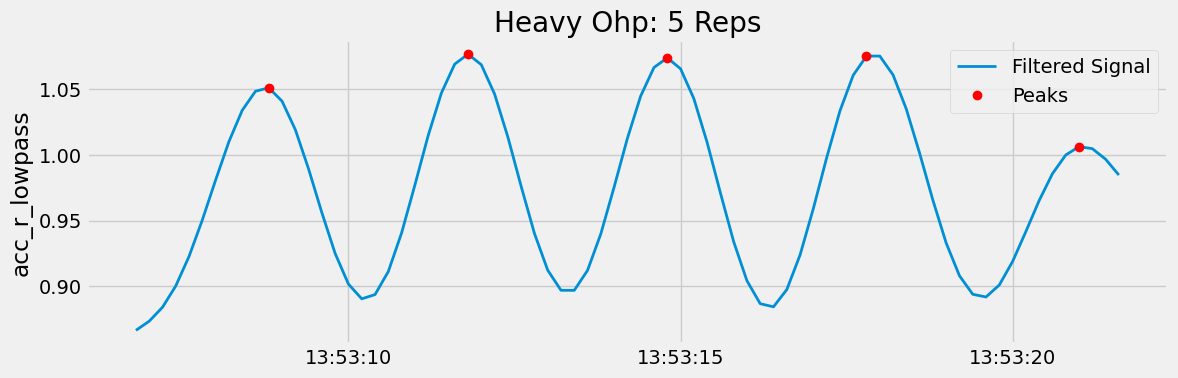

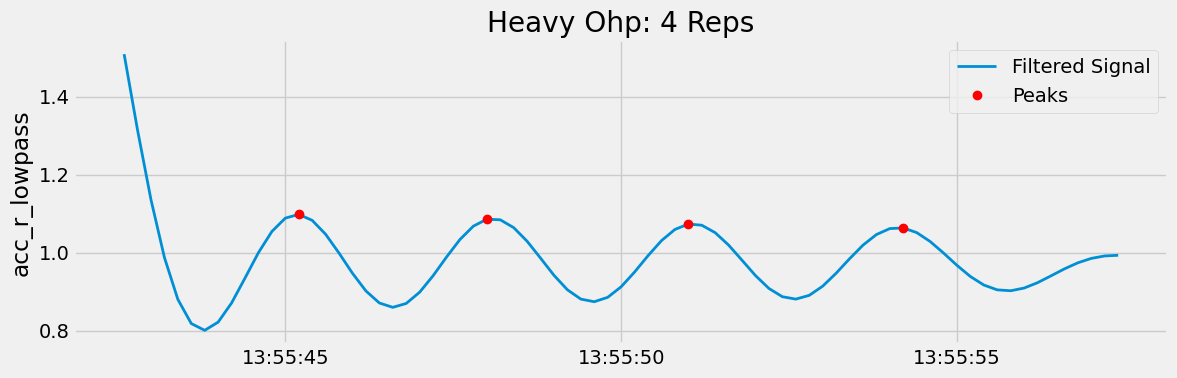

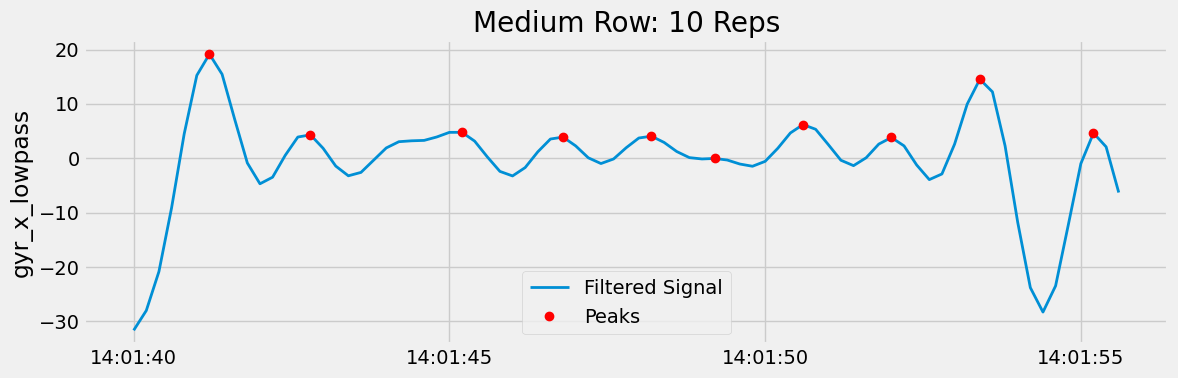

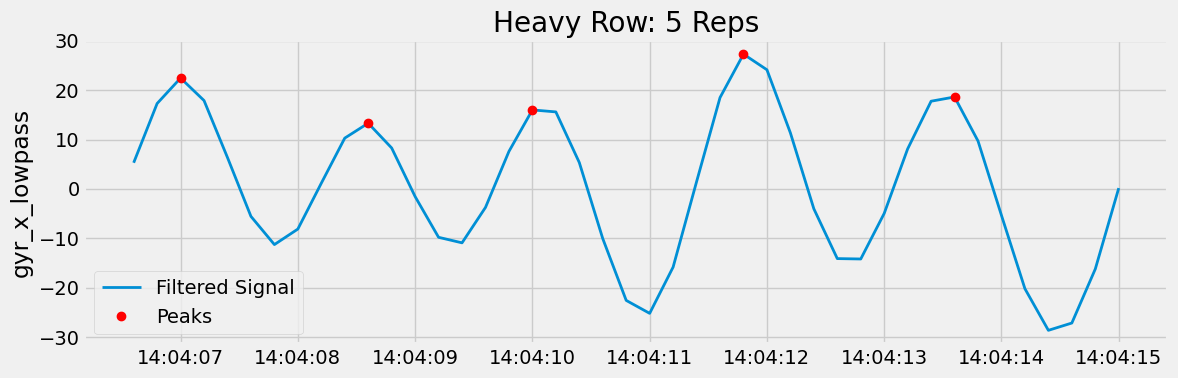

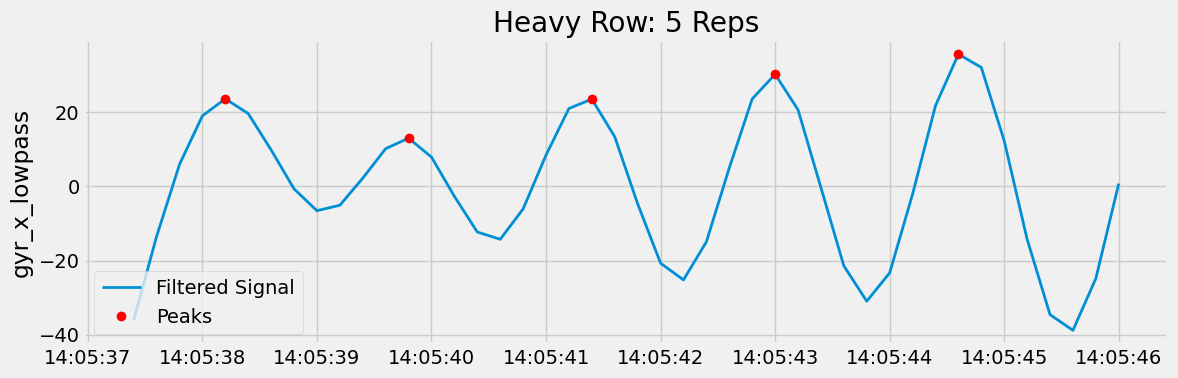

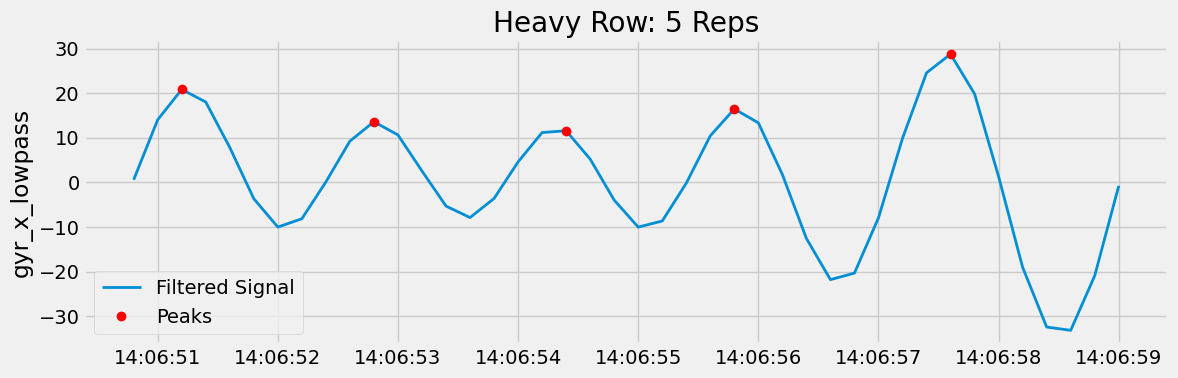

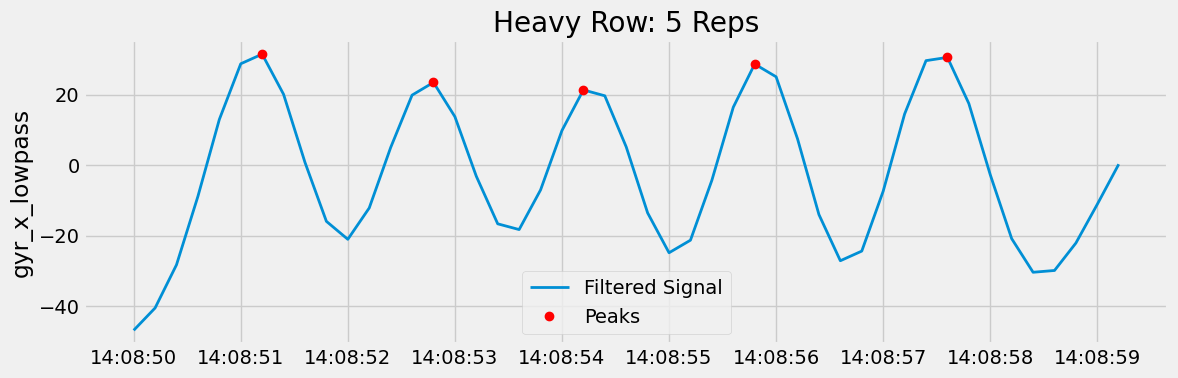

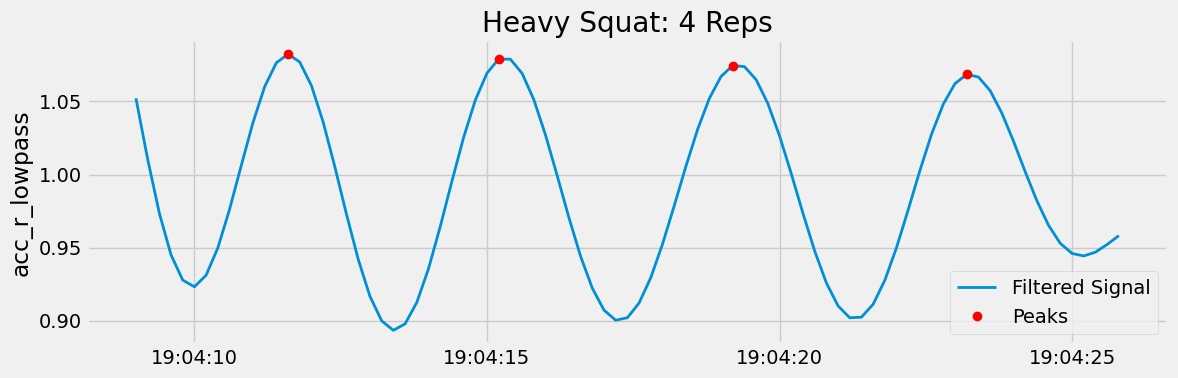

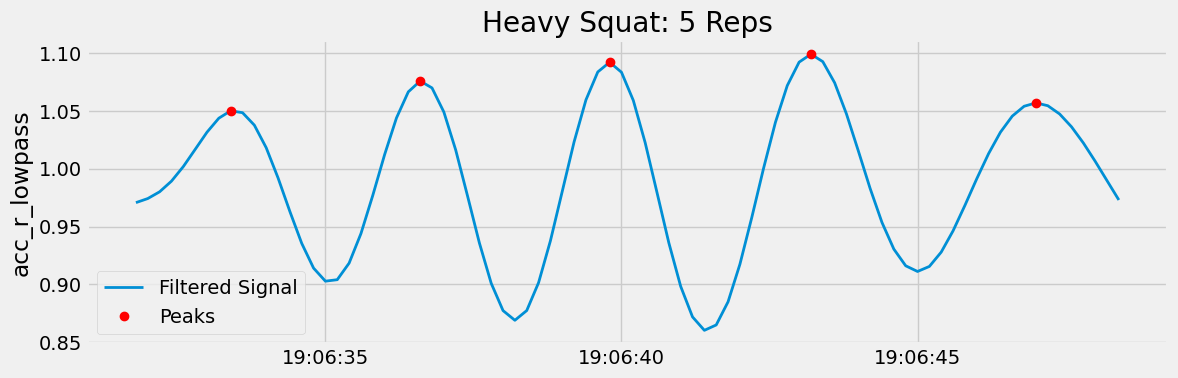

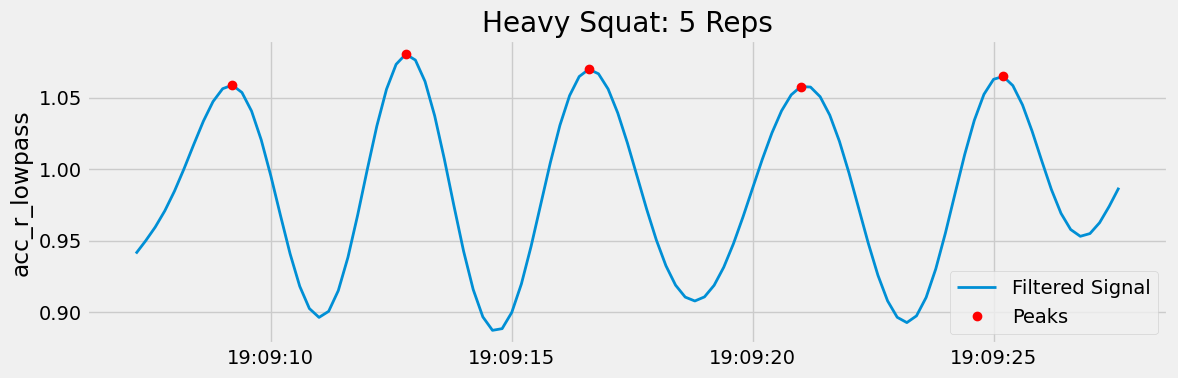

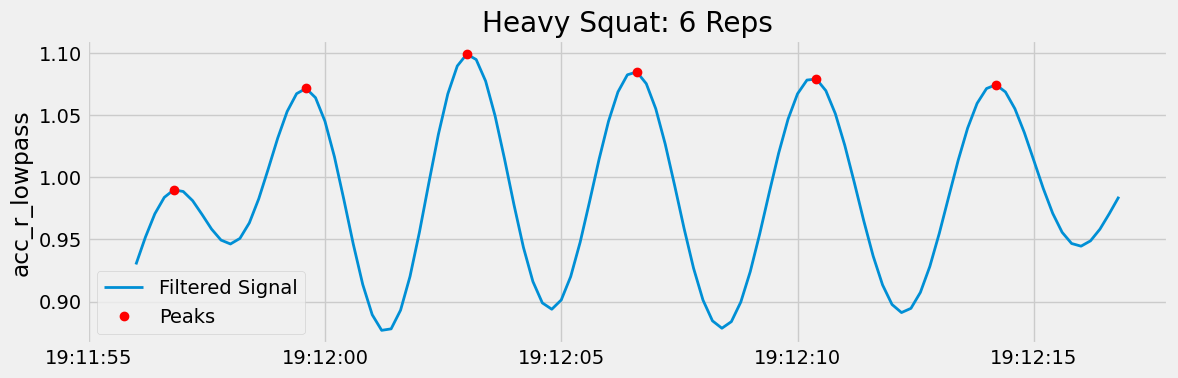

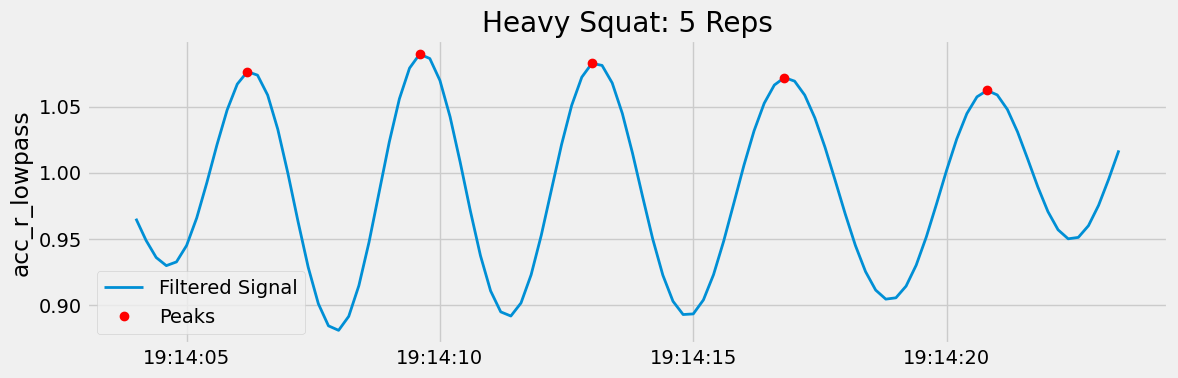

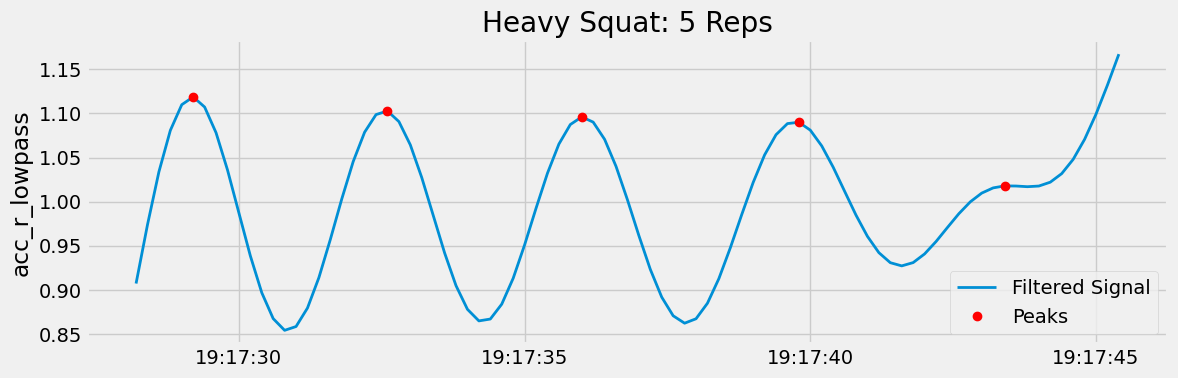

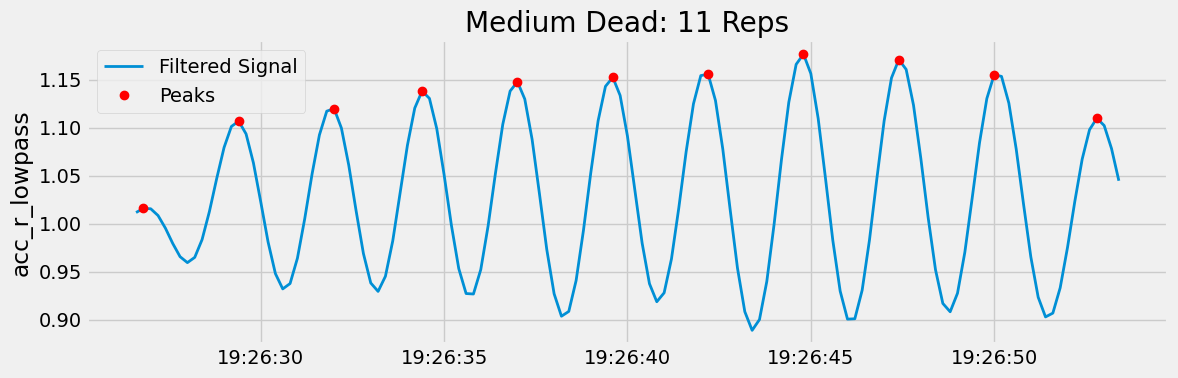

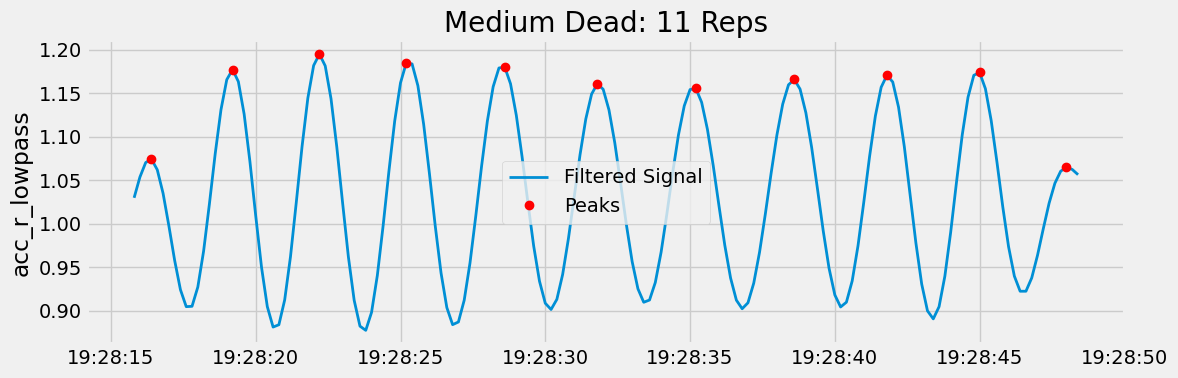

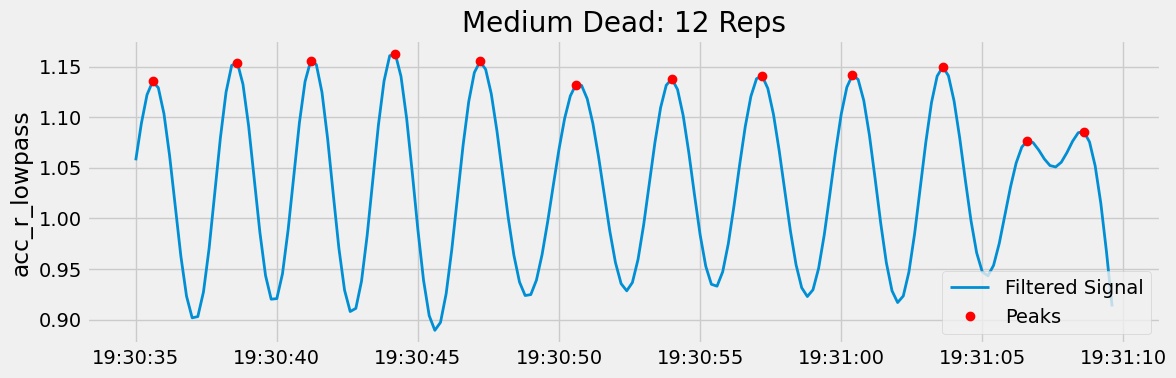

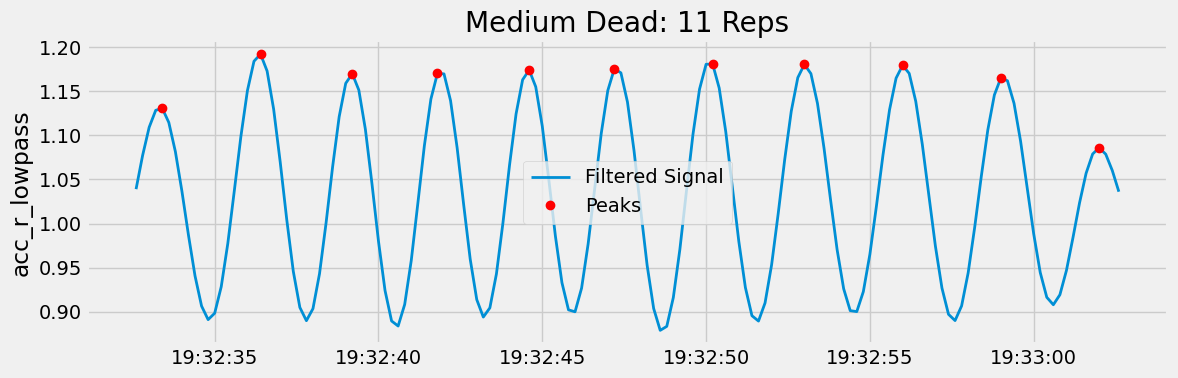

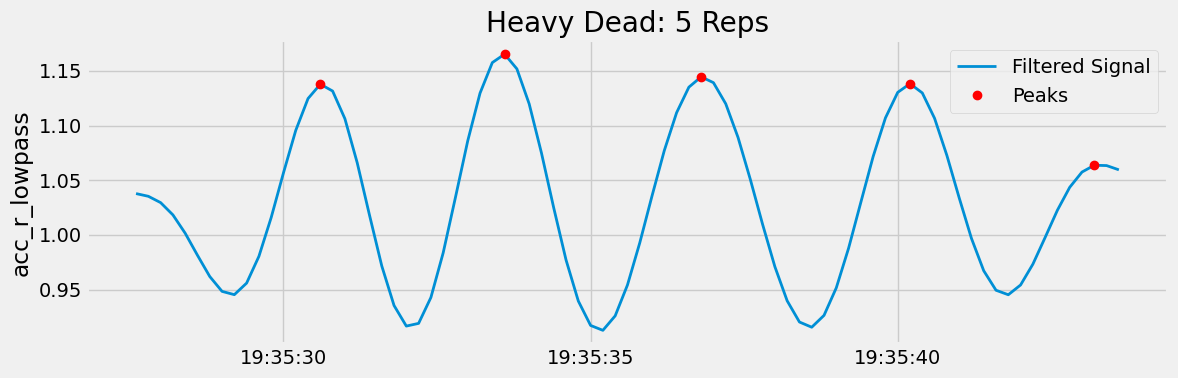

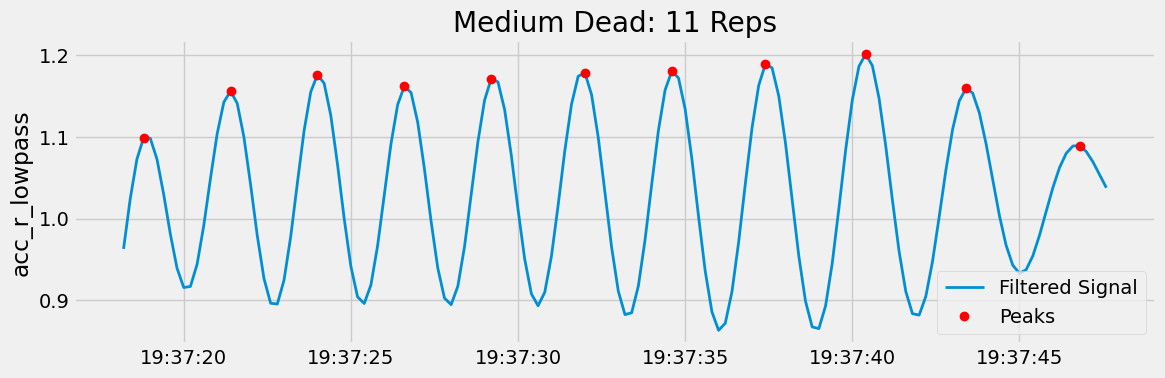

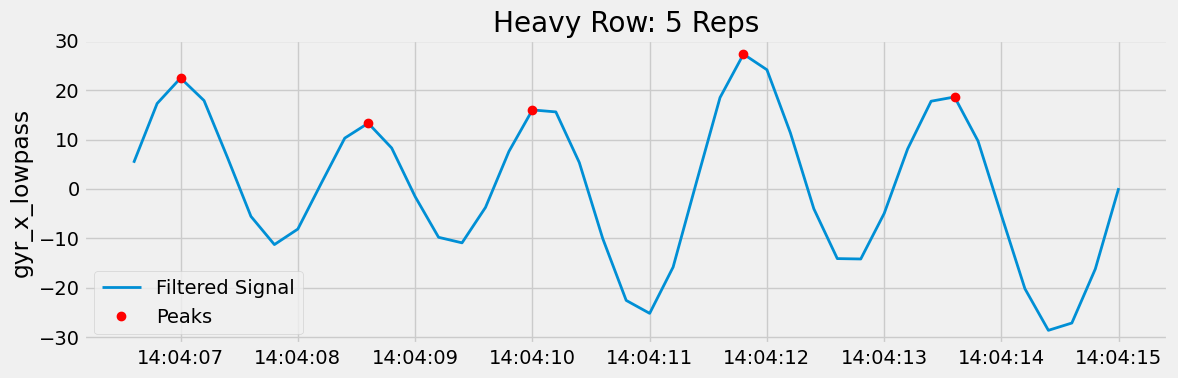

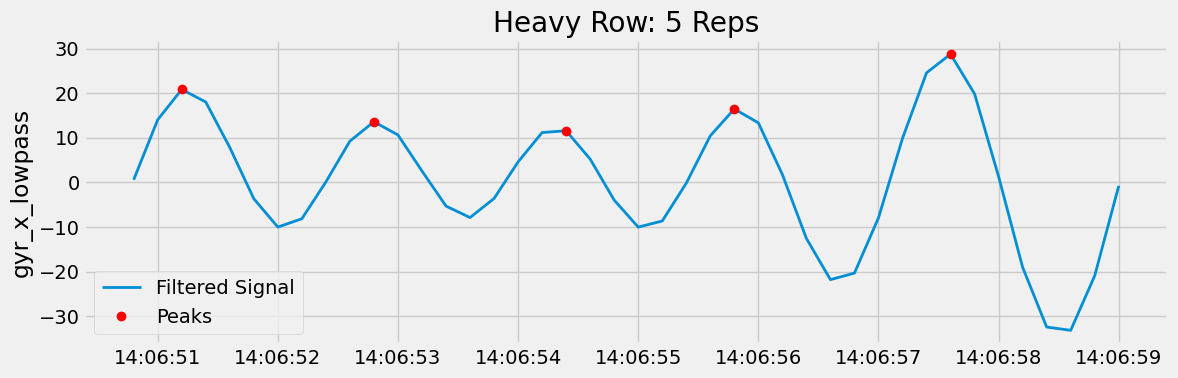

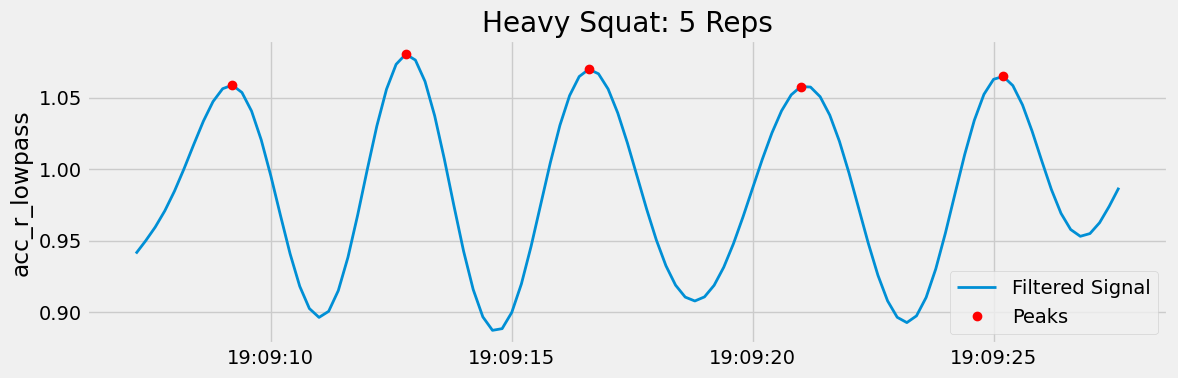

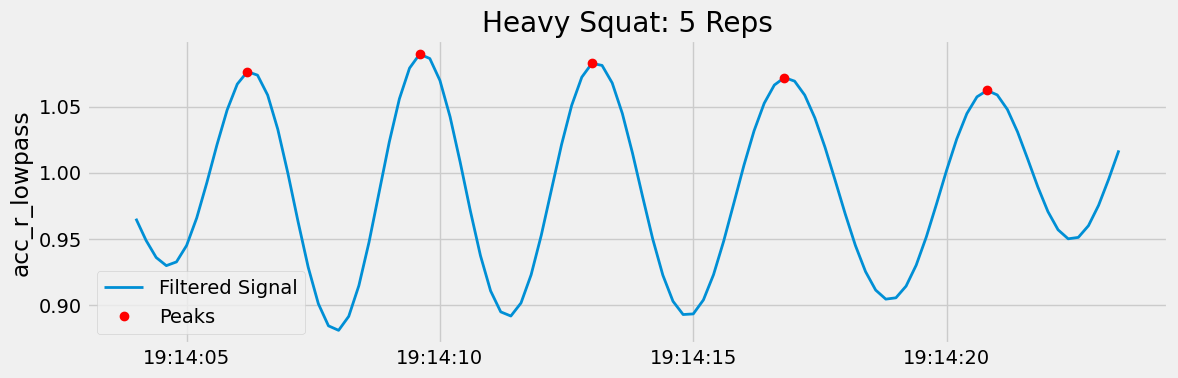

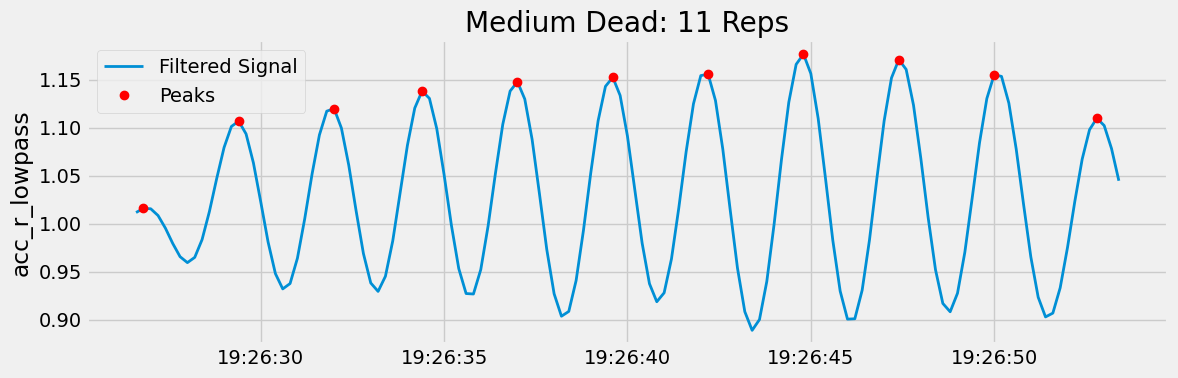

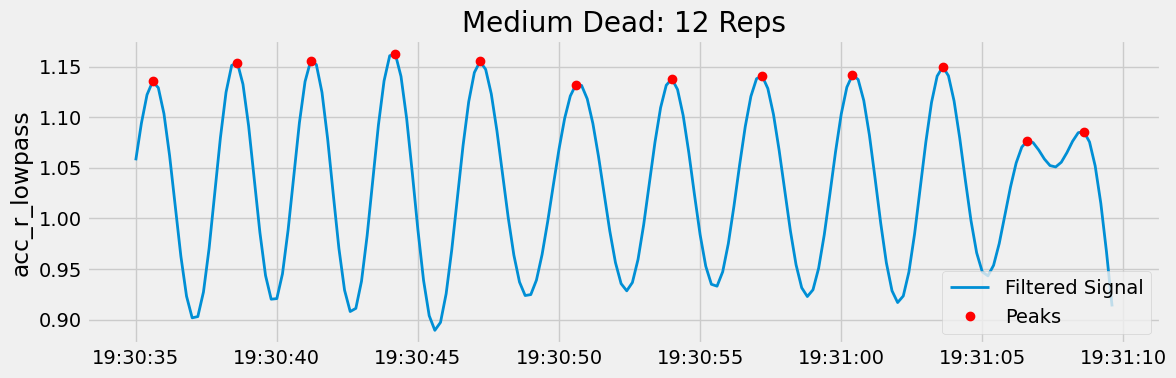

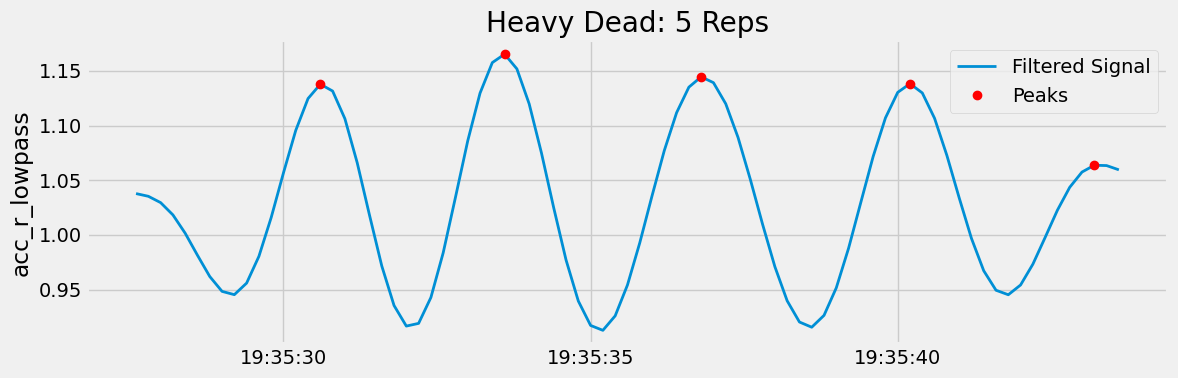

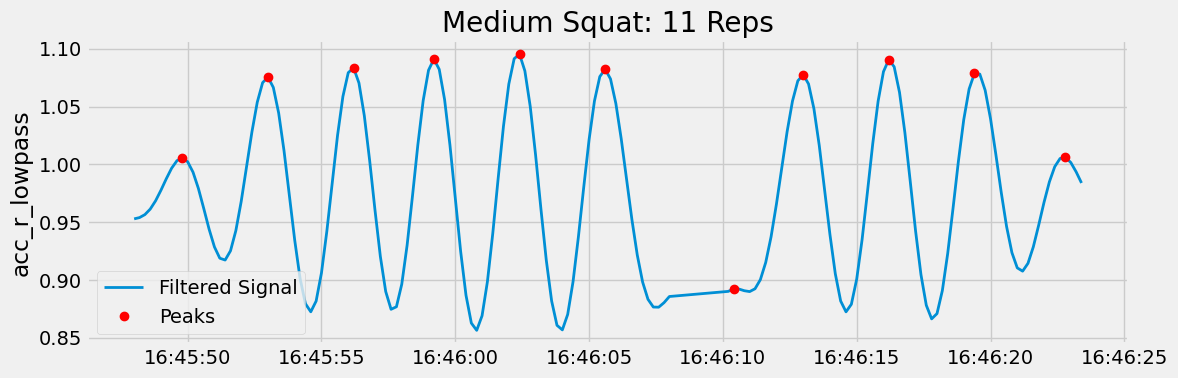

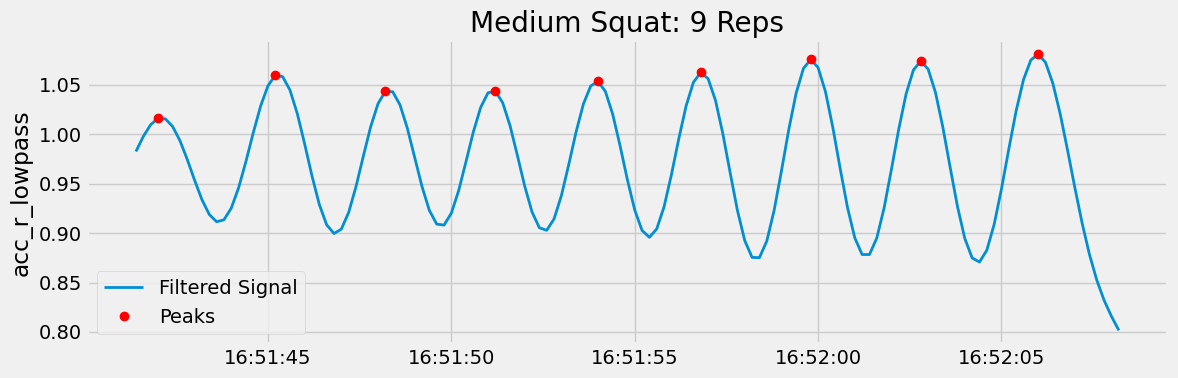

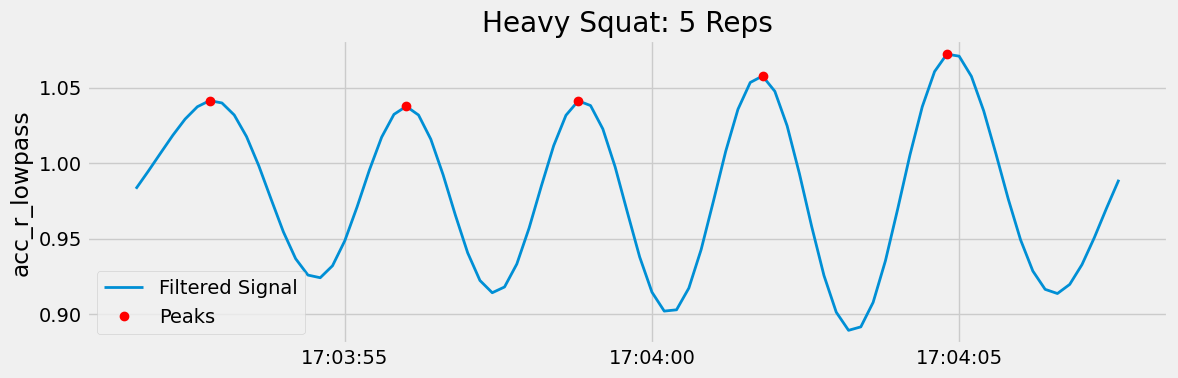

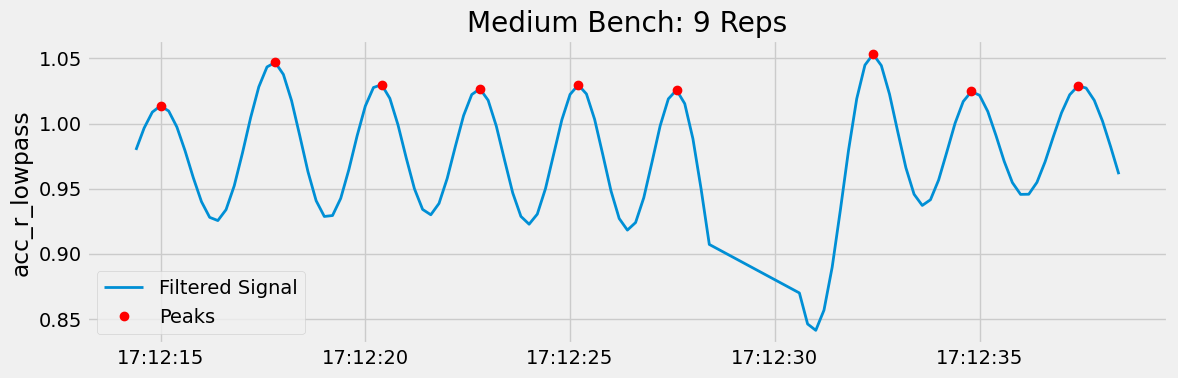

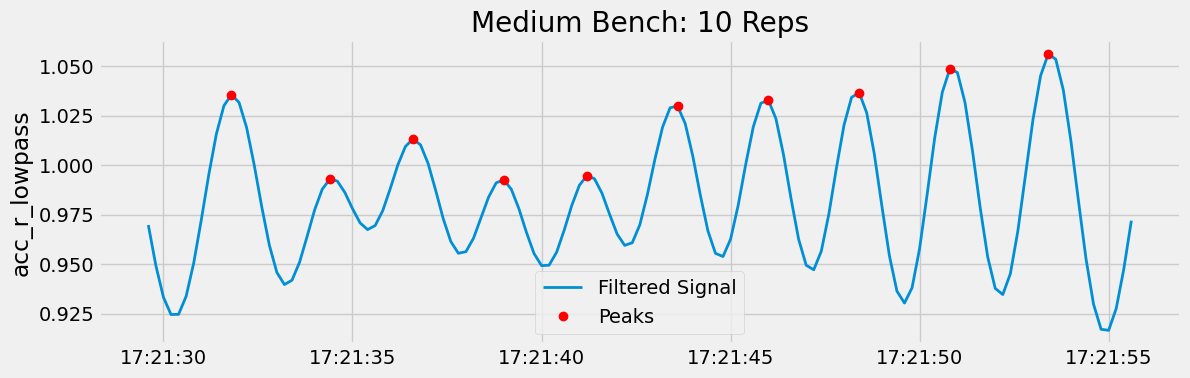

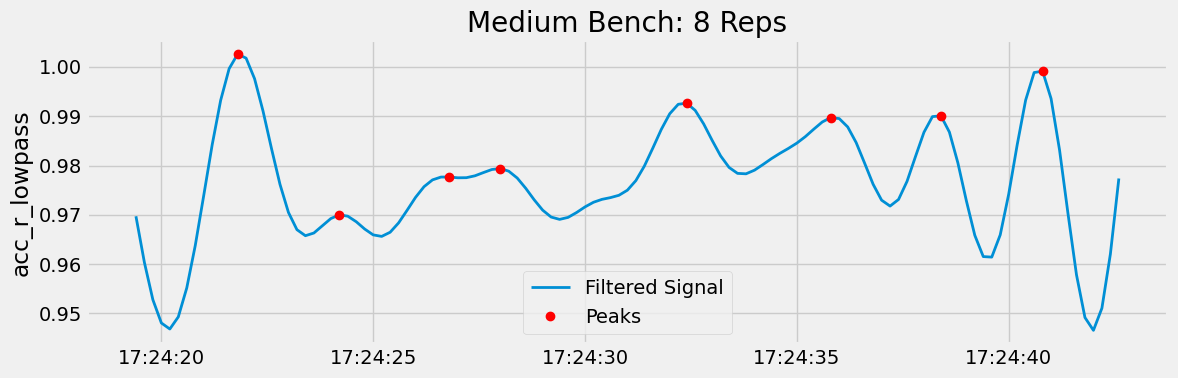

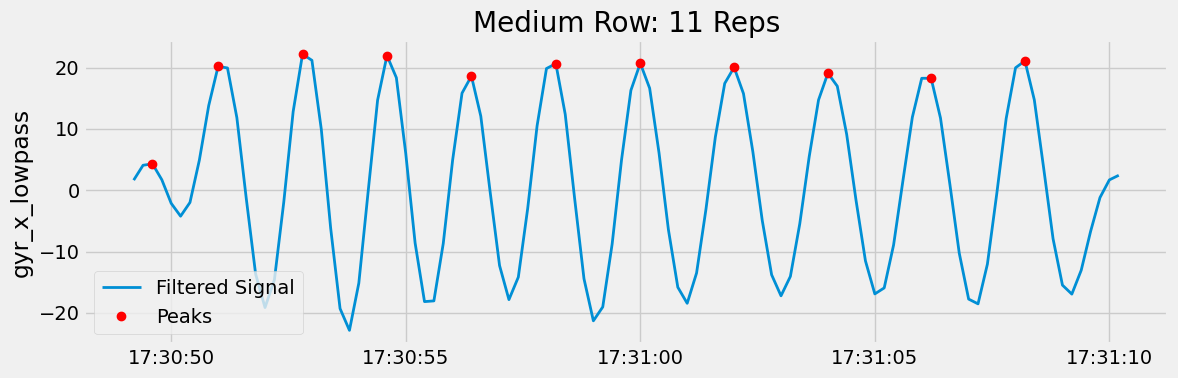

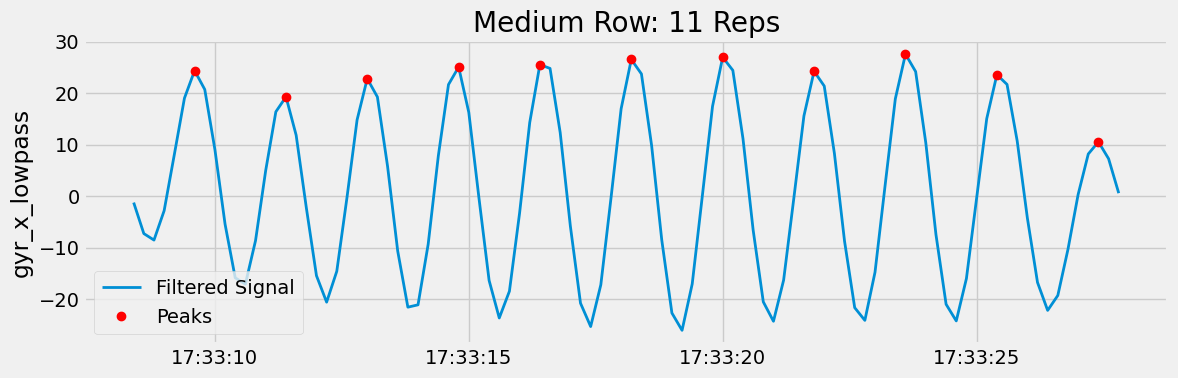

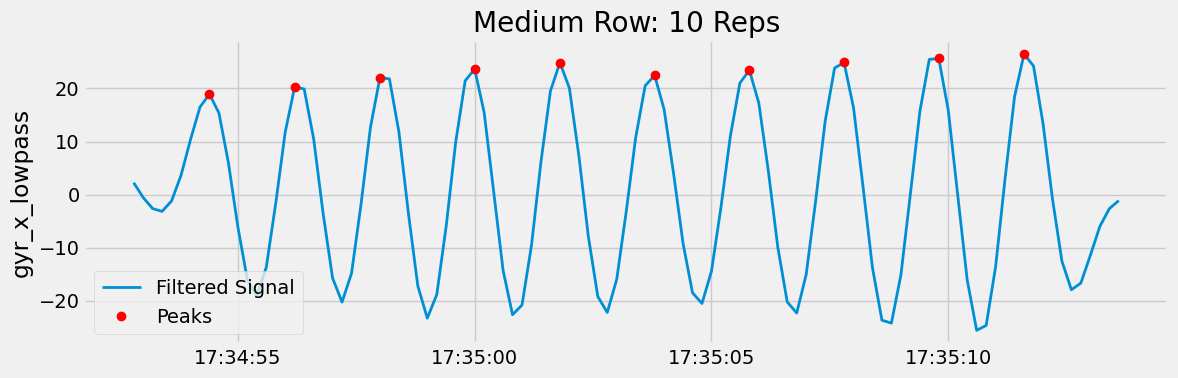

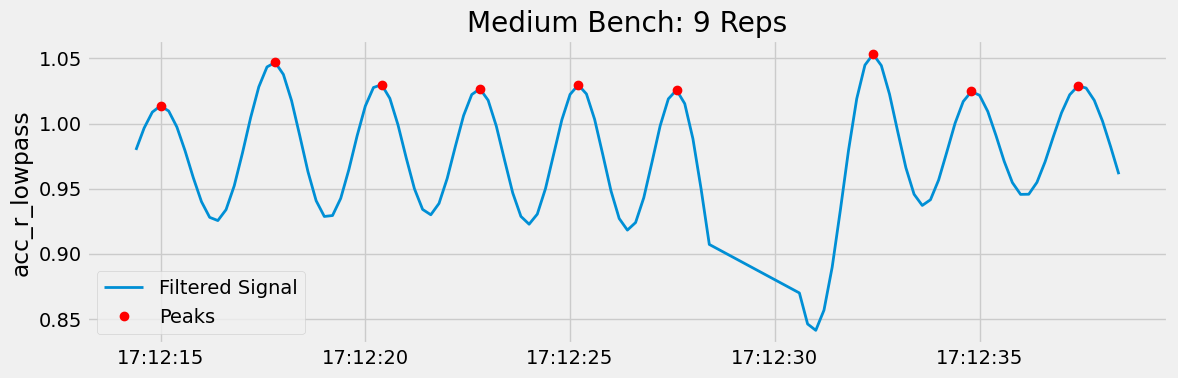

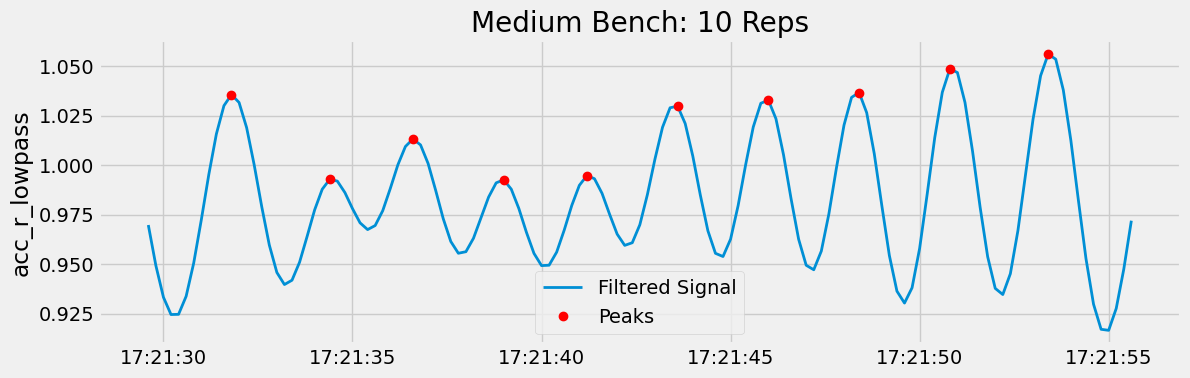

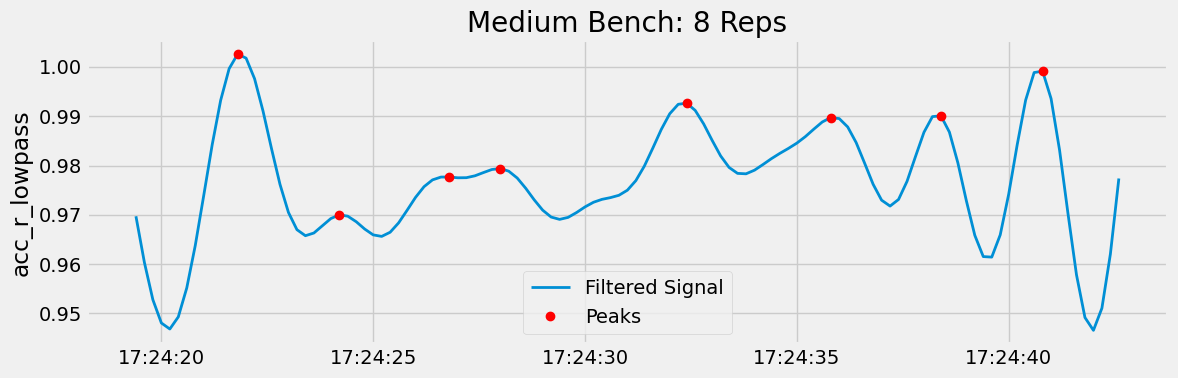

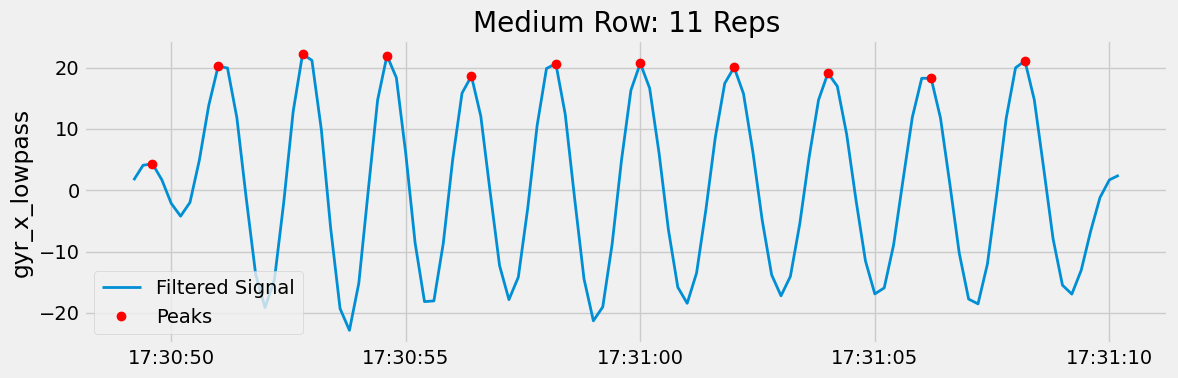

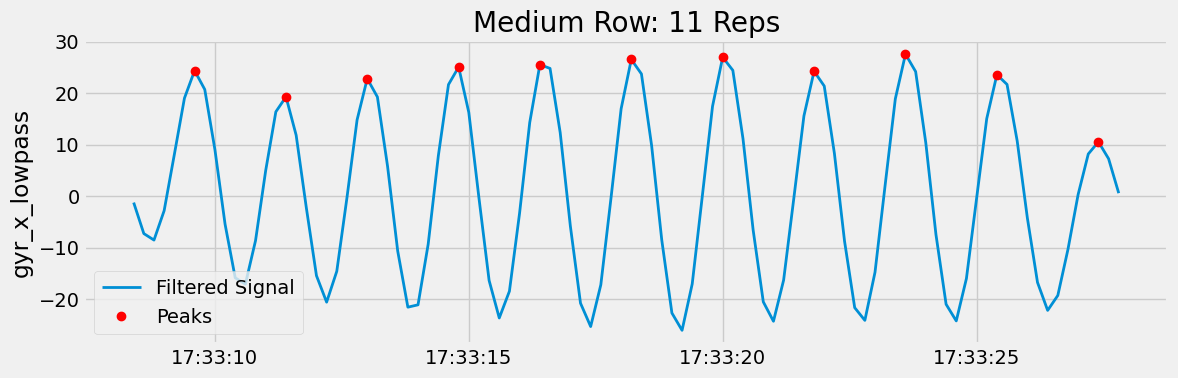

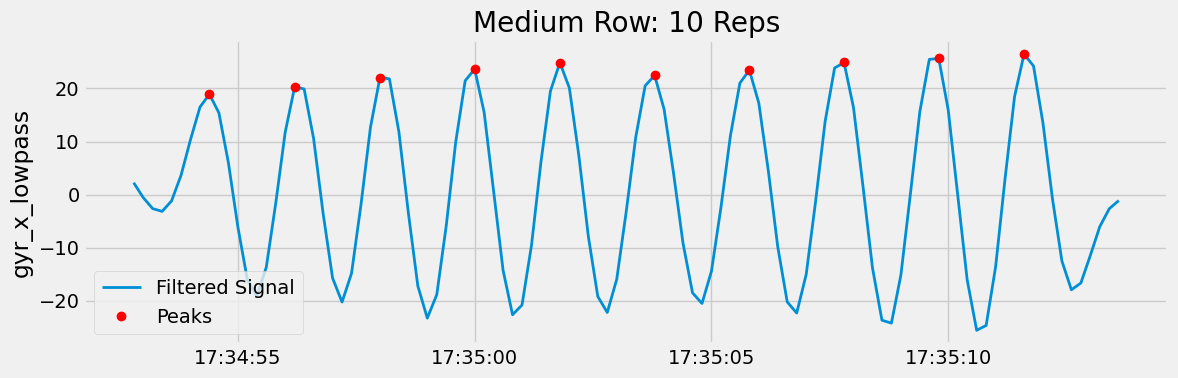

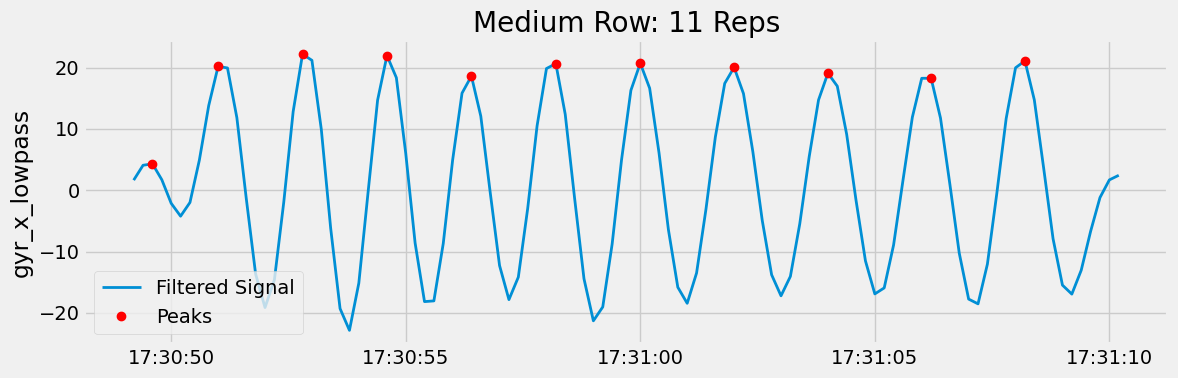

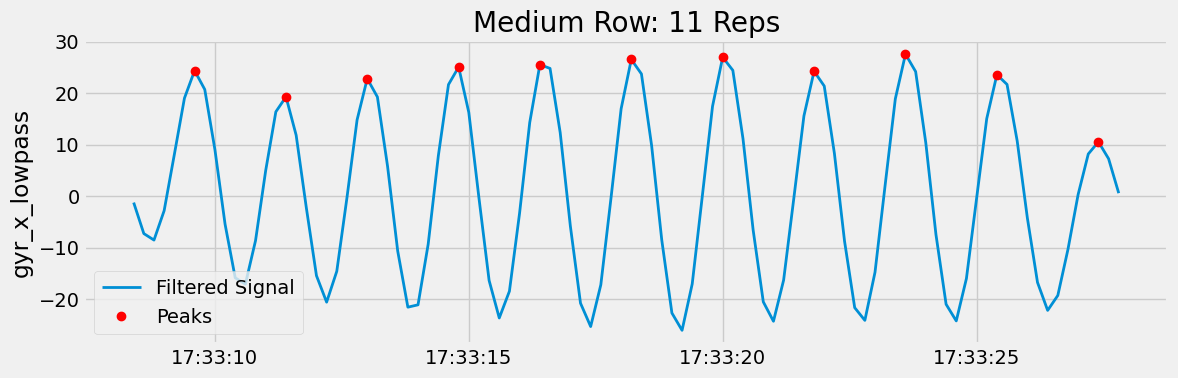

In [53]:
for s in df["set"].unique():
    subset = df[df["set"] == s]

    # Set default values
    column = "acc_r"
    cutoff = 0.4

    # Adjust cutoff based on label or category
    if subset["label"].iloc[0]== "squat":
        cutoff = 0.35
    elif subset["label"].iloc[0] == "row":
        cutoff = 0.65
        column = "gyr_x"
    elif subset["label"].iloc[0] == "ohp":
        cutoff = 0.35

    # Count reps
    reps = count_reps(subset, cutoff=cutoff, column=column)

    # Update rep_df if needed
    reps_df.loc[reps_df["set"] == s, "reps_pred"] = reps

In [54]:
reps_df

category  label  set  reps  reps_pred
0     heavy  bench    1     5        5.0
1     heavy  bench    2     5        4.0
2     heavy  bench    3     5        5.0
3     heavy  bench    4     5        5.0
4     heavy  bench   30     5        5.0
..      ...    ...  ...   ...        ...
80   medium  squat   28    10        8.0
81   medium  squat   29    10        8.0
82   medium  squat   38    10        7.0
83   medium  squat   63    10       11.0
84   medium  squat   64    10        9.0

[85 rows x 5 columns]

In [55]:
error = mean_absolute_error(reps_df["reps"], reps_df["reps_pred"]).round(2)

In [56]:
error

0.88

<ipython-input-58-a0f433e112fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reps_df.groupby(["label" ,"category"])["reps" , "reps_pred"].mean().plot.bar()


<AxesSubplot: xlabel='label,category'>

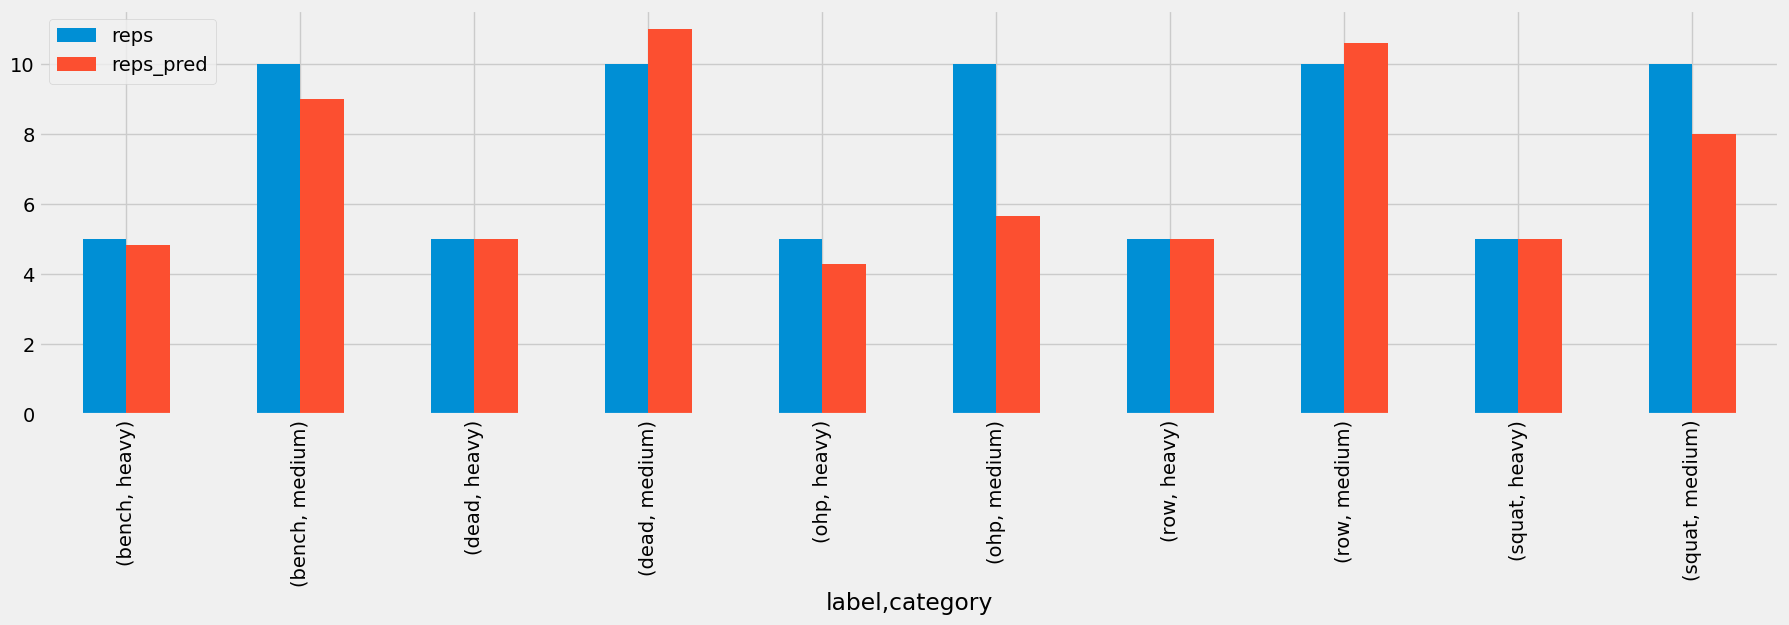

In [58]:
reps_df.groupby(["label" ,"category"])["reps" , "reps_pred"].mean().plot.bar()

In [60]:
reps_df["error"] = error

In [61]:
reps_df

category  label  set  reps  reps_pred  error
0     heavy  bench    1     5        5.0   0.88
1     heavy  bench    2     5        4.0   0.88
2     heavy  bench    3     5        5.0   0.88
3     heavy  bench    4     5        5.0   0.88
4     heavy  bench   30     5        5.0   0.88
..      ...    ...  ...   ...        ...    ...
80   medium  squat   28    10        8.0   0.88
81   medium  squat   29    10        8.0   0.88
82   medium  squat   38    10        7.0   0.88
83   medium  squat   63    10       11.0   0.88
84   medium  squat   64    10        9.0   0.88

[85 rows x 6 columns]

In [64]:
reps_df["error"] = (reps_df["reps"] - reps_df["reps_pred"]).abs().round(2)

In [65]:
reps_df

category  label  set  reps  reps_pred  error
0     heavy  bench    1     5        5.0    0.0
1     heavy  bench    2     5        4.0    1.0
2     heavy  bench    3     5        5.0    0.0
3     heavy  bench    4     5        5.0    0.0
4     heavy  bench   30     5        5.0    0.0
..      ...    ...  ...   ...        ...    ...
80   medium  squat   28    10        8.0    2.0
81   medium  squat   29    10        8.0    2.0
82   medium  squat   38    10        7.0    3.0
83   medium  squat   63    10       11.0    1.0
84   medium  squat   64    10        9.0    1.0

[85 rows x 6 columns]